In [1]:
# Supressing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

import scipy.stats as stat
from collections import Counter

from sklearn.svm import SVC
from tqdm.notebook import tqdm_notebook
from imblearn.over_sampling import SMOTE,  ADASYN
from imblearn.combine import SMOTETomek, SMOTEENN
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import KFold , GridSearchCV, train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import confusion_matrix as cm, accuracy_score as ac, classification_report as report,\
roc_curve, roc_auc_score , recall_score , precision_score, f1_score

In [3]:
# Importing Training Dataset
salary_train = pd.read_csv('C:/Support Vector Machines/SalaryData_Train(1).csv')
salary_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
# Importing Testing Dataset
salary_test = pd.read_csv('C:/Support Vector Machines/SalaryData_Test(1).csv')
salary_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [5]:
import pandas as pd


# Concatenate 'salary_train' and 'salary_test' vertically
raw_data = pd.concat([salary_train, salary_test], axis=0, ignore_index=True)

# Reset the index
raw_data.reset_index(inplace=True, drop=True)

# View the concatenated DataFrame
raw_data


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
45217,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
45218,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
45219,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


# A Binary Classification Task as our classes to predict is 'Yes' or 'No' a Binomial Distribution

In [6]:
# print shape of dataset with rows and columns
print(raw_data.shape)
# print top 5 records
raw_data.head()

(45221, 14)


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
raw_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,38.548086,10.118463,1101.454700,88.548617,40.938038
std,13.217981,2.552909,7506.511295,404.838249,12.007640
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45221 entries, 0 to 45220
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45221 non-null  int64 
 1   workclass      45221 non-null  object
 2   education      45221 non-null  object
 3   educationno    45221 non-null  int64 
 4   maritalstatus  45221 non-null  object
 5   occupation     45221 non-null  object
 6   relationship   45221 non-null  object
 7   race           45221 non-null  object
 8   sex            45221 non-null  object
 9   capitalgain    45221 non-null  int64 
 10  capitalloss    45221 non-null  int64 
 11  hoursperweek   45221 non-null  int64 
 12  native         45221 non-null  object
 13  Salary         45221 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.8+ MB


In [9]:
raw_data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

# Numerical Variables

In [10]:
# List of Numerical Variables
numerical_features=[feature for feature in raw_data.columns if raw_data[feature].dtypes != 'O']

print('Number of numerical variables:', len(numerical_features))

# Visualize the numerical variables
raw_data[numerical_features].head()

Number of numerical variables: 5


,age,educationno,capitalgain,capitalloss,hoursperweek
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40


In [11]:
discrete_feature=[feature for feature in numerical_features if len(raw_data[feature].unique())<25]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 1


Continuous Variable

In [12]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 4


Categorical Variables

In [13]:
# find categorical variables

categorical = [var for var in raw_data.columns if raw_data[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [14]:
# view frequency counts of values in categorical variables

for var in categorical: 
    
    print(raw_data[var].value_counts())

workclass
 Private             33306
 Self-emp-not-inc     3796
 Local-gov            3100
 State-gov            1946
 Self-emp-inc         1646
 Federal-gov          1406
 Without-pay            21
Name: count, dtype: int64
education
 HS-grad         14783
 Some-college     9898
 Bachelors        7570
 Masters          2514
 Assoc-voc        1959
 11th             1619
 Assoc-acdm       1507
 10th             1223
 7th-8th           823
 Prof-school       785
 9th               676
 12th              577
 Doctorate         544
 5th-6th           449
 1st-4th           222
 Preschool          72
Name: count, dtype: int64
maritalstatus
 Married-civ-spouse       21055
 Never-married            14597
 Divorced                  6297
 Separated                 1411
 Widowed                   1277
 Married-spouse-absent      552
 Married-AF-spouse           32
Name: count, dtype: int64
occupation
 Craft-repair         6020
 Prof-specialty       6008
 Exec-managerial      5984
 Adm-clerical  

In [15]:
# View frequency distribution of categorical variables
for var in categorical:
    print(raw_data[var].value_counts() / float(len(raw_data)))


workclass
 Private             0.736516
 Self-emp-not-inc    0.083943
 Local-gov           0.068552
 State-gov           0.043033
 Self-emp-inc        0.036399
 Federal-gov         0.031092
 Without-pay         0.000464
Name: count, dtype: float64
education
 HS-grad         0.326906
 Some-college    0.218881
 Bachelors       0.167400
 Masters         0.055594
 Assoc-voc       0.043321
 11th            0.035802
 Assoc-acdm      0.033325
 10th            0.027045
 7th-8th         0.018200
 Prof-school     0.017359
 9th             0.014949
 12th            0.012760
 Doctorate       0.012030
 5th-6th         0.009929
 1st-4th         0.004909
 Preschool       0.001592
Name: count, dtype: float64
maritalstatus
 Married-civ-spouse       0.465602
 Never-married            0.322793
 Divorced                 0.139249
 Separated                0.031202
 Widowed                  0.028239
 Married-spouse-absent    0.012207
 Married-AF-spouse        0.000708
Name: count, dtype: float64
occupation


In [16]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(raw_data[var].unique()), ' labels')

workclass  contains  7  labels
education  contains  16  labels
maritalstatus  contains  7  labels
occupation  contains  14  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native  contains  40  labels
Salary  contains  2  labels


In [17]:
# Select only numeric columns for correlation
numeric_columns = raw_data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Display the correlation matrix
correlation_matrix


,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.037623,0.079682,0.059426,0.101992
educationno,0.037623,1.000000,0.126907,0.081741,0.146206
capitalgain,0.079682,0.126907,1.000000,-0.032095,0.083880
capitalloss,0.059426,0.081741,-0.032095,1.000000,0.054220
hoursperweek,0.101992,0.146206,0.083880,0.054220,1.000000


To obtain a better understanding of the dataset, the distribution of key variables and the relationships among them were plotted.

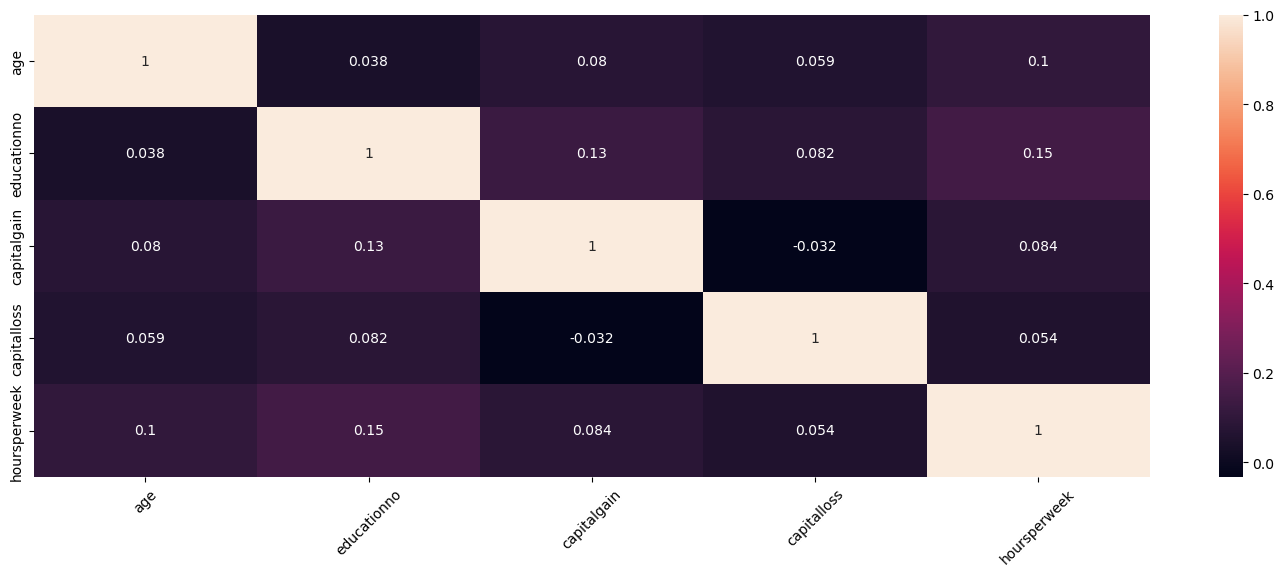

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(18, 6))
sns.heatmap(correlation_matrix, annot=True)
plt.xticks(rotation=45)
plt.show()


Lets analyze the continuous values by creating histograms to understand the distribution of the numerical features

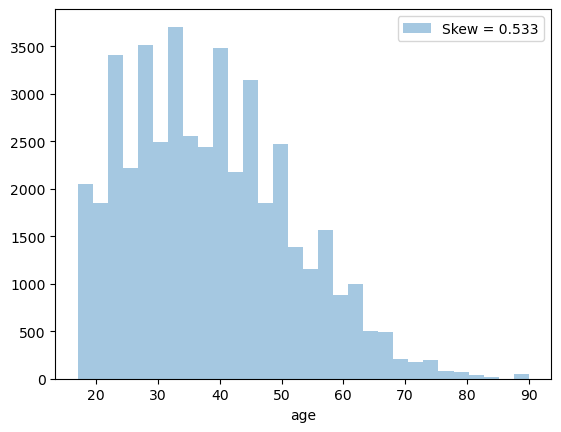

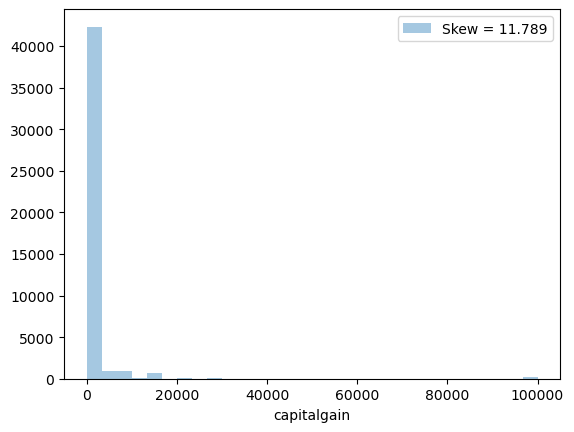

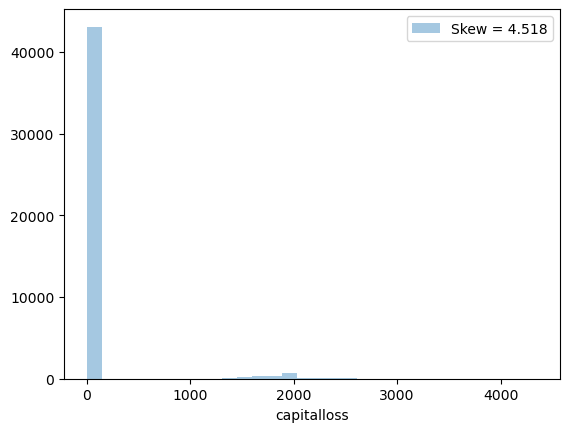

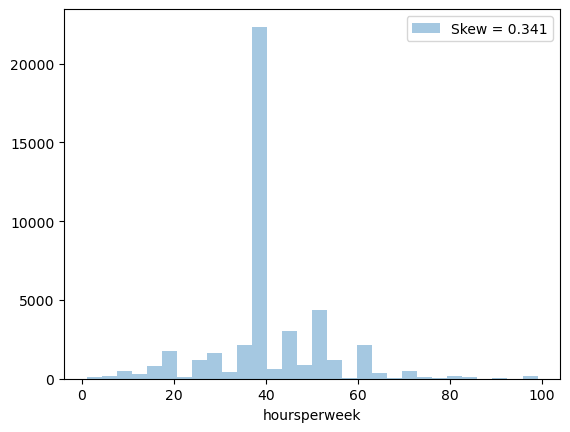

In [19]:
for feat in continuous_feature:
    skew = raw_data[feat].skew()
    sns.distplot(raw_data[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [20]:
# Detect observations with more than one outlier

def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in df.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        
        # Interquartile rrange (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(raw_data[continuous_feature])))) 

The dataset contains 29 observations with more than 2 outliers


In [21]:
continuous_feature

['age', 'capitalgain', 'capitalloss', 'hoursperweek']

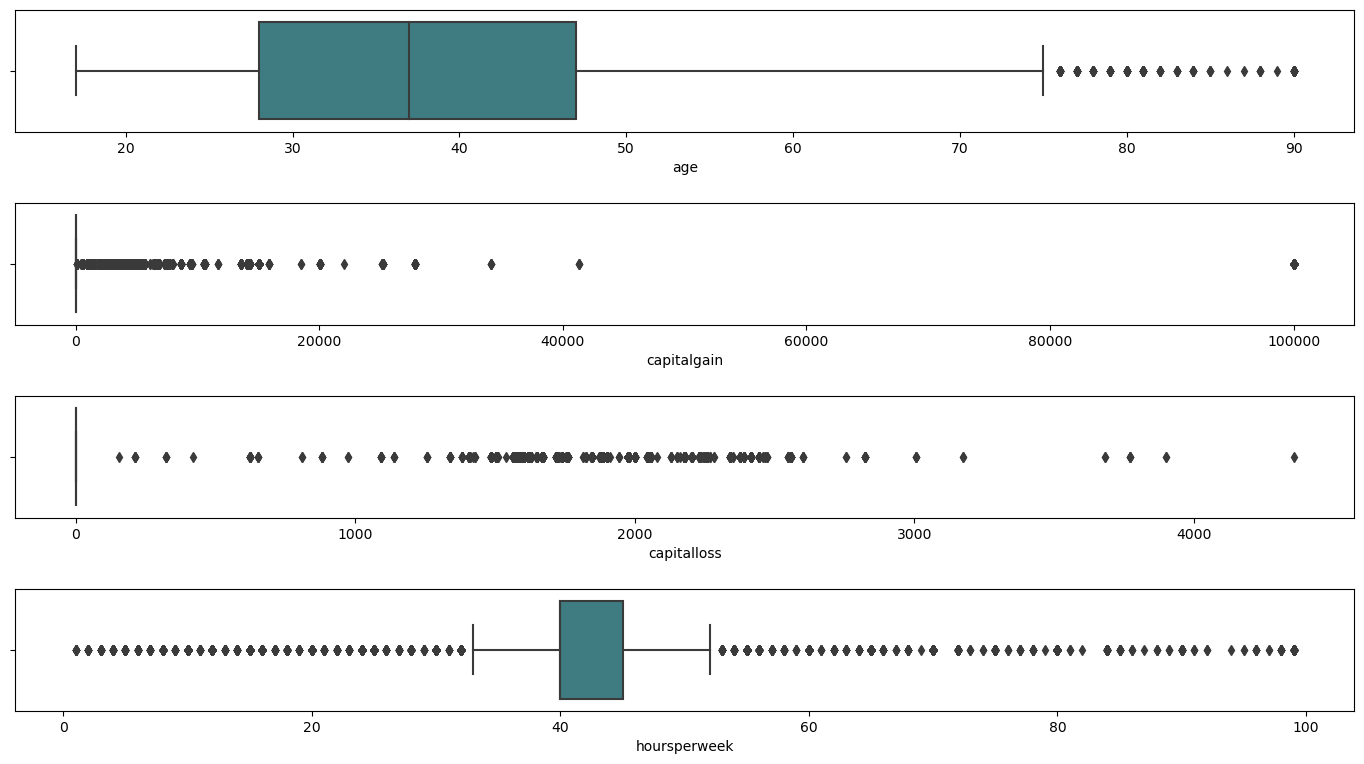

In [22]:
ot=raw_data.copy() 
fig, axes=plt.subplots(4,1,figsize=(14,8),sharex=False,sharey=False)
sns.boxplot(x='age',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='capitalgain',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='capitalloss',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='hoursperweek',data=ot,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

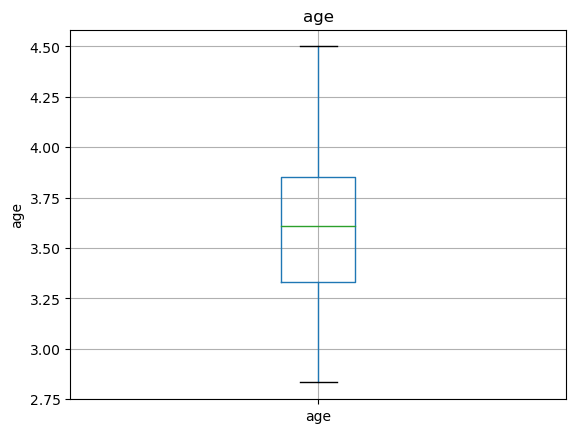

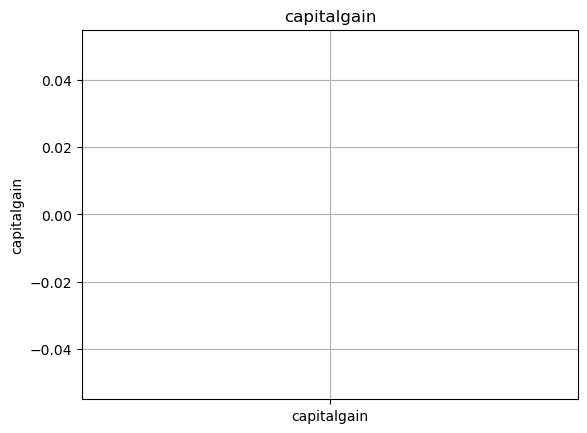

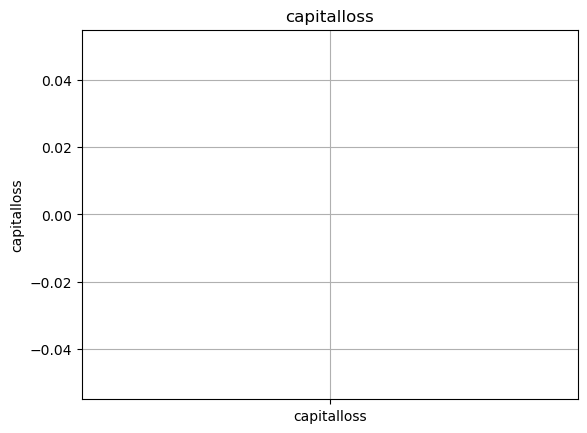

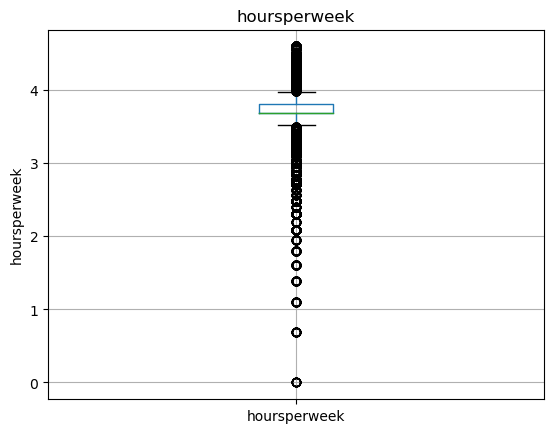

In [23]:
for feature in continuous_feature:
    data=raw_data.copy()
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

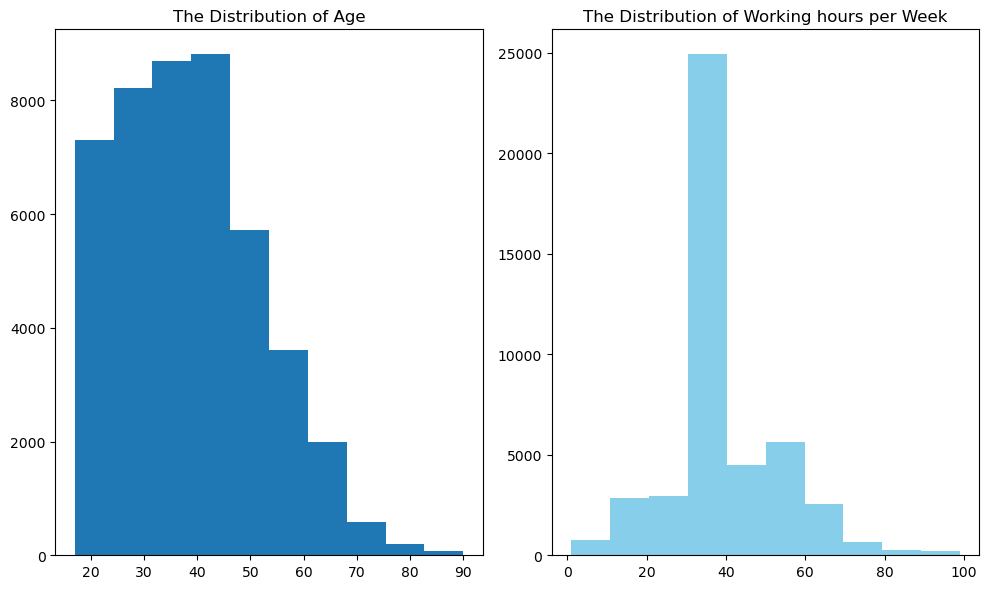

In [24]:
dist_age_balance = plt.figure(figsize = (10,6))

ra1 = dist_age_balance.add_subplot(1,2,1) 
ra2 = dist_age_balance.add_subplot(1,2,2)

ra1.hist(raw_data['age'])
ra1.set_title('The Distribution of Age')

ra2.hist(raw_data['hoursperweek'], color = 'skyblue')
ra2.set_title('The Distribution of Working hours per Week')

plt.tight_layout() 
plt.show()

In [25]:
raw_data[['age','hoursperweek']].describe()

,age,hoursperweek
count,45221.000000,45221.000000
mean,38.548086,40.938038
std,13.217981,12.007640
min,17.000000,1.000000
25%,28.000000,40.000000
50%,37.000000,40.000000
75%,47.000000,45.000000
max,90.000000,99.000000


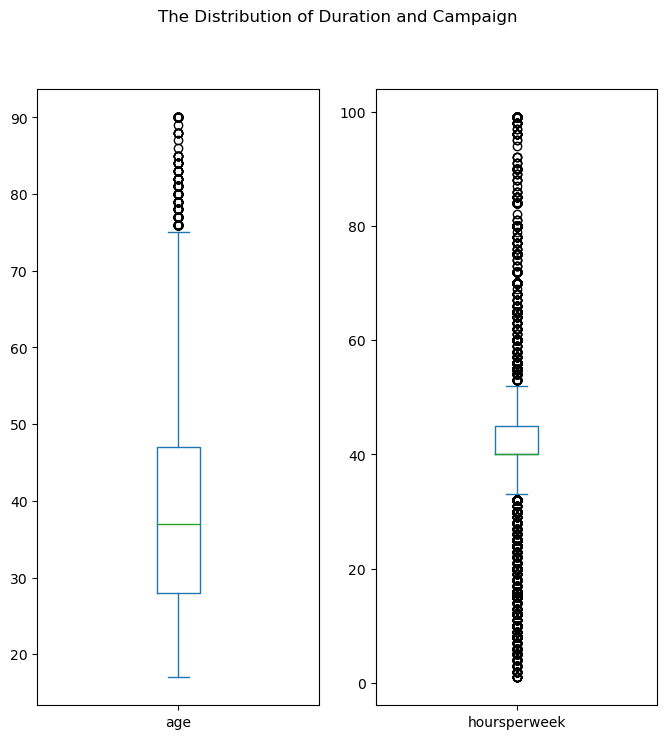

In [26]:
# Change the unit of 'duration' from seconds to minutes
df1 = raw_data.copy()
df1[['age','hoursperweek']].plot(kind = 'box', 
                                                      figsize = (8,8),
                                                      subplots = True, layout = (1,2),
                                                      sharex = False, sharey = False,
                                                      title='The Distribution of Duration and Campaign')
plt.show()

In [27]:
#age and salary

b_df = pd.DataFrame()
b_df['age_wrt_salary_more_than_50k'] = (raw_data[raw_data['Salary'] == ' <=50K'][['Salary','age']].describe())['age']
b_df['age_wrt_salary_less_than_50k'] = (raw_data[raw_data['Salary'] == ' >50K'][['Salary','age']].describe())['age']

b_df

,age_wrt_salary_more_than_50k,age_wrt_salary_less_than_50k
count,34013.000000,11208.000000
mean,36.749566,44.006067
std,13.564858,10.340502
min,17.000000,19.000000
25%,26.000000,36.000000
50%,34.000000,43.000000
75%,46.000000,51.000000
max,90.000000,90.000000


<Axes: title={'center': 'Age and Salary statistics'}>

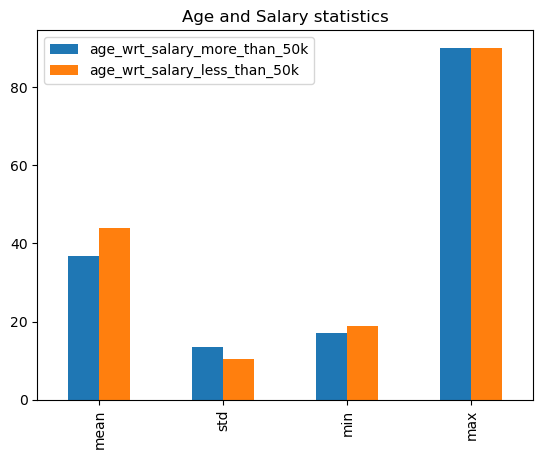

In [28]:
b_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Age and Salary statistics')

In [29]:
#capitalgain and salary

a_df = pd.DataFrame()
a_df['capitalgain_wrt_salary_more_than_50k'] = (raw_data[raw_data['Salary'] == ' <=50K'][['Salary','capitalgain']].describe())['capitalgain']
a_df['capitalgain_wrt_salary_less_than_50k'] = (raw_data[raw_data['Salary'] == ' >50K'][['Salary','capitalgain']].describe())['capitalgain']

a_df

,capitalgain_wrt_salary_more_than_50k,capitalgain_wrt_salary_less_than_50k
count,34013.000000,11208.000000
mean,149.027783,3991.791667
std,927.460669,14616.543746
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,41310.000000,99999.000000


<Axes: title={'center': 'Capital Gain and Salary statistics'}>

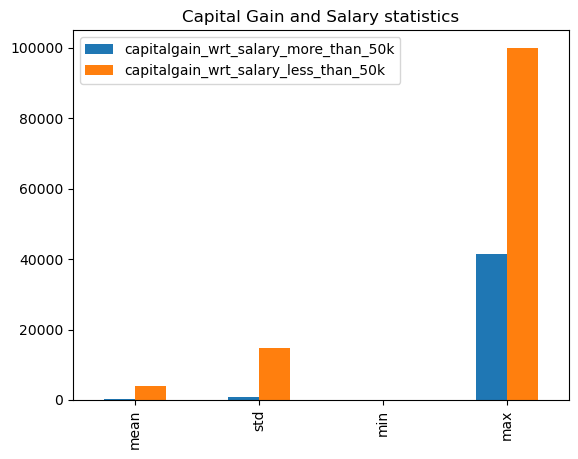

In [30]:
a_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Capital Gain and Salary statistics')

In [31]:
#capitalloss and deposit
c_df = pd.DataFrame()
c_df['capitalloss_wrt_salary_more_than_50k'] = (raw_data[raw_data['Salary'] == ' <=50K'][['Salary','capitalloss']].describe())['capitalloss']
c_df['capitalloss_wrt_salary_less_than_50k'] = (raw_data[raw_data['Salary'] == ' >50K'][['Salary','capitalloss']].describe())['capitalloss']

c_df

,capitalloss_wrt_salary_more_than_50k,capitalloss_wrt_salary_less_than_50k
count,34013.000000,11208.000000
mean,53.969188,193.487063
std,312.007128,592.642319
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,4356.000000,3683.000000


<Axes: title={'center': 'Capital Loss and Salary statistics'}>

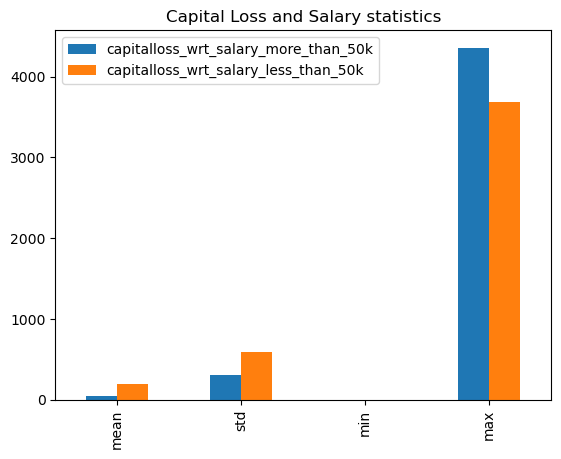

In [32]:
c_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Capital Loss and Salary statistics')

In [33]:
#hoursperweek and deposit
p_df = pd.DataFrame()
p_df['hoursperweek_wrt_salary_more_than_50k'] = (raw_data[raw_data['Salary'] == ' <=50K'][['Salary','hoursperweek']].describe())['hoursperweek']
p_df['hoursperweek_wrt_salary_less_than_50k'] = (raw_data[raw_data['Salary'] == ' >50K'][['Salary','hoursperweek']].describe())['hoursperweek']

p_df

,hoursperweek_wrt_salary_more_than_50k,hoursperweek_wrt_salary_less_than_50k
count,34013.000000,11208.000000
mean,39.372005,45.690489
std,11.974303,10.797764
min,1.000000,1.000000
25%,37.000000,40.000000
50%,40.000000,40.000000
75%,40.000000,50.000000
max,99.000000,99.000000


<Axes: title={'center': 'Working Hours per Week and Salary statistics'}>

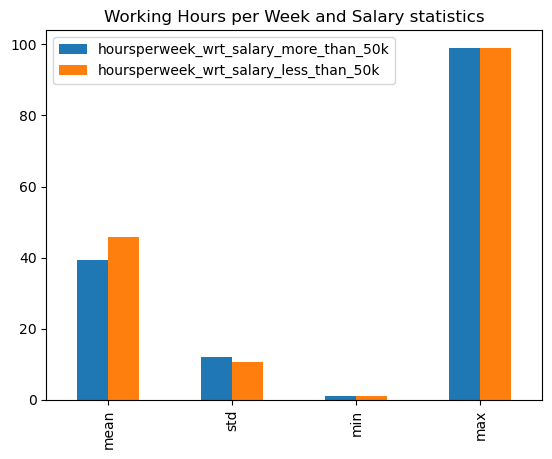

In [34]:
p_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Working Hours per Week and Salary statistics')

In [35]:
categorical_features=[feature for feature in raw_data.columns if raw_data[feature].dtype=='O']
print('Number of Categorical Features:',len(categorical_features), '\n', categorical_features)
raw_data[categorical_features].head()

Number of Categorical Features: 9 
 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [36]:
for feature in categorical_features:
    print("{} number of unique categories in feature named {}".format(len(raw_data[feature].unique()),feature))

7 number of unique categories in feature named workclass
16 number of unique categories in feature named education
7 number of unique categories in feature named maritalstatus
14 number of unique categories in feature named occupation
6 number of unique categories in feature named relationship
5 number of unique categories in feature named race
2 number of unique categories in feature named sex
40 number of unique categories in feature named native
2 number of unique categories in feature named Salary


In [37]:
# Decide which categorical variables you want to use in model
for feature in raw_data.columns:
    if raw_data[feature].dtypes == 'object':# in pandas it is object
        unique_cat = len(raw_data[feature].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=feature, unique_cat=unique_cat))
        print(raw_data[feature].value_counts())
        print()

Feature 'workclass' has 7 unique categories
workclass
 Private             33306
 Self-emp-not-inc     3796
 Local-gov            3100
 State-gov            1946
 Self-emp-inc         1646
 Federal-gov          1406
 Without-pay            21
Name: count, dtype: int64

Feature 'education' has 16 unique categories
education
 HS-grad         14783
 Some-college     9898
 Bachelors        7570
 Masters          2514
 Assoc-voc        1959
 11th             1619
 Assoc-acdm       1507
 10th             1223
 7th-8th           823
 Prof-school       785
 9th               676
 12th              577
 Doctorate         544
 5th-6th           449
 1st-4th           222
 Preschool          72
Name: count, dtype: int64

Feature 'maritalstatus' has 7 unique categories
maritalstatus
 Married-civ-spouse       21055
 Never-married            14597
 Divorced                  6297
 Separated                 1411
 Widowed                   1277
 Married-spouse-absent      552
 Married-AF-spouse        

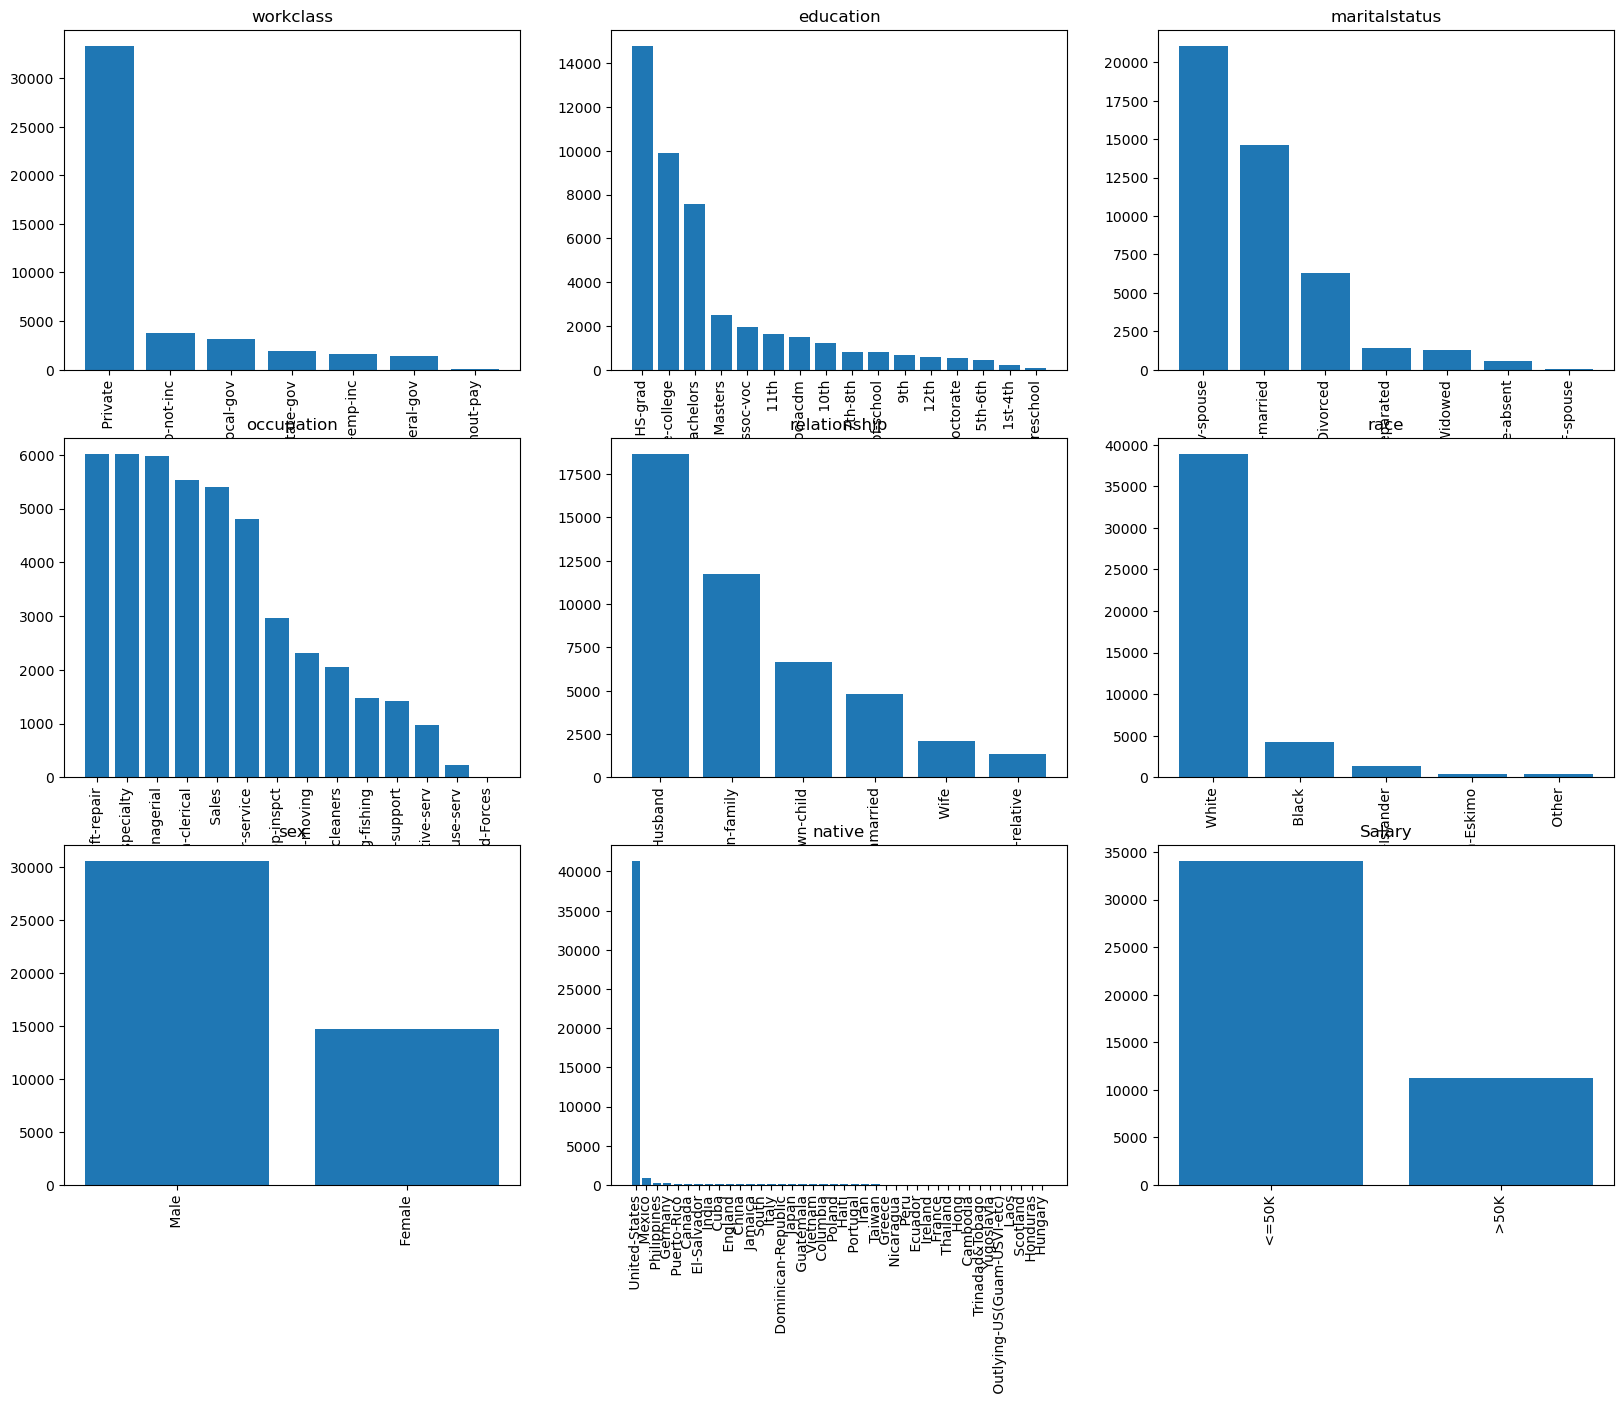

In [38]:
fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in categorical_features:
    value_counts = raw_data[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

Text(0.5, 1.0, 'Working Class')

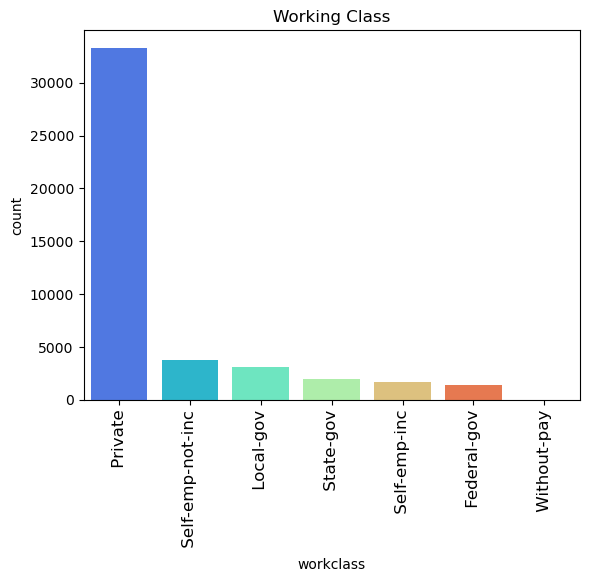

In [39]:
pal = sns.color_palette('rainbow')
sns.countplot(x='workclass', data=raw_data, palette = pal, 
              order=raw_data['workclass'].value_counts().index, );
plt.xticks(rotation = 90,fontsize = 12)
plt.title('Working Class')

Text(0.5, 1.0, 'Marital Status')

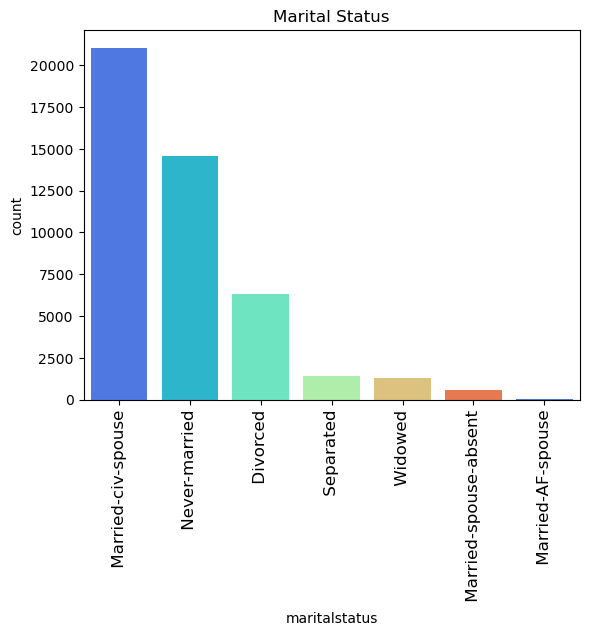

In [40]:
sns.countplot(x='maritalstatus', data=raw_data, palette = pal, 
              order=raw_data['maritalstatus'].value_counts().index)
plt.xticks(fontsize = 12,rotation = 90)
plt.title('Marital Status')

Text(0.5, 1.0, 'Education')

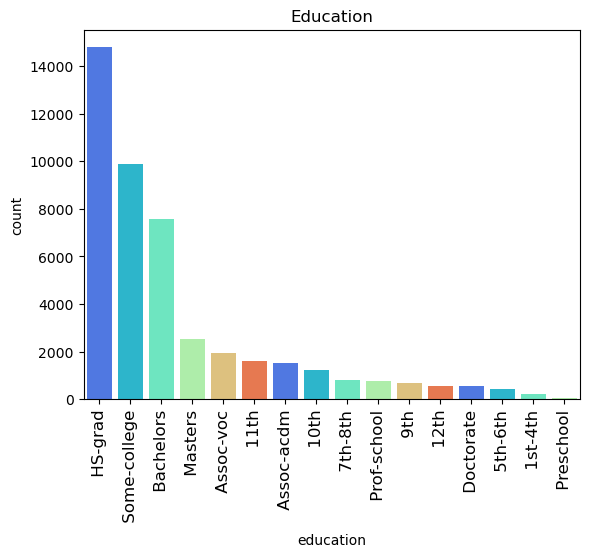

In [41]:
sns.countplot(x='education', data=raw_data, palette = pal, 
              order=raw_data['education'].value_counts().index)
plt.xticks(fontsize = 12,rotation = 90)
plt.title('Education')

Text(0.5, 1.0, 'Relationship')

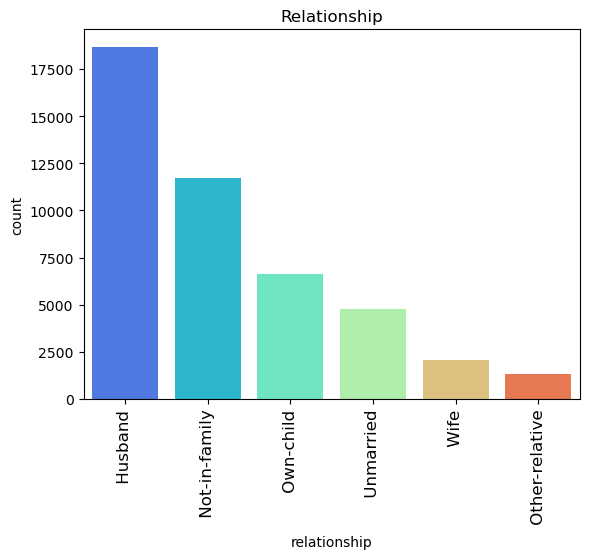

In [42]:
sns.countplot(x='relationship', data=raw_data, palette = pal, 
              order=raw_data['relationship'].value_counts().index)
plt.xticks(fontsize = 12,rotation = 90)
plt.title('Relationship')

Text(0.5, 1.0, 'Sex')

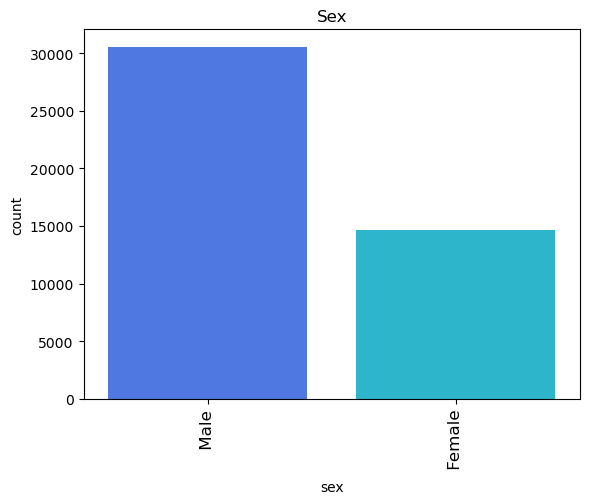

In [43]:
sns.countplot(x='sex', data=raw_data, palette = pal, 
              order=raw_data['sex'].value_counts().index)
plt.xticks(fontsize = 12,rotation=90)
plt.title('Sex')

Text(0.5, 1.0, 'Native')

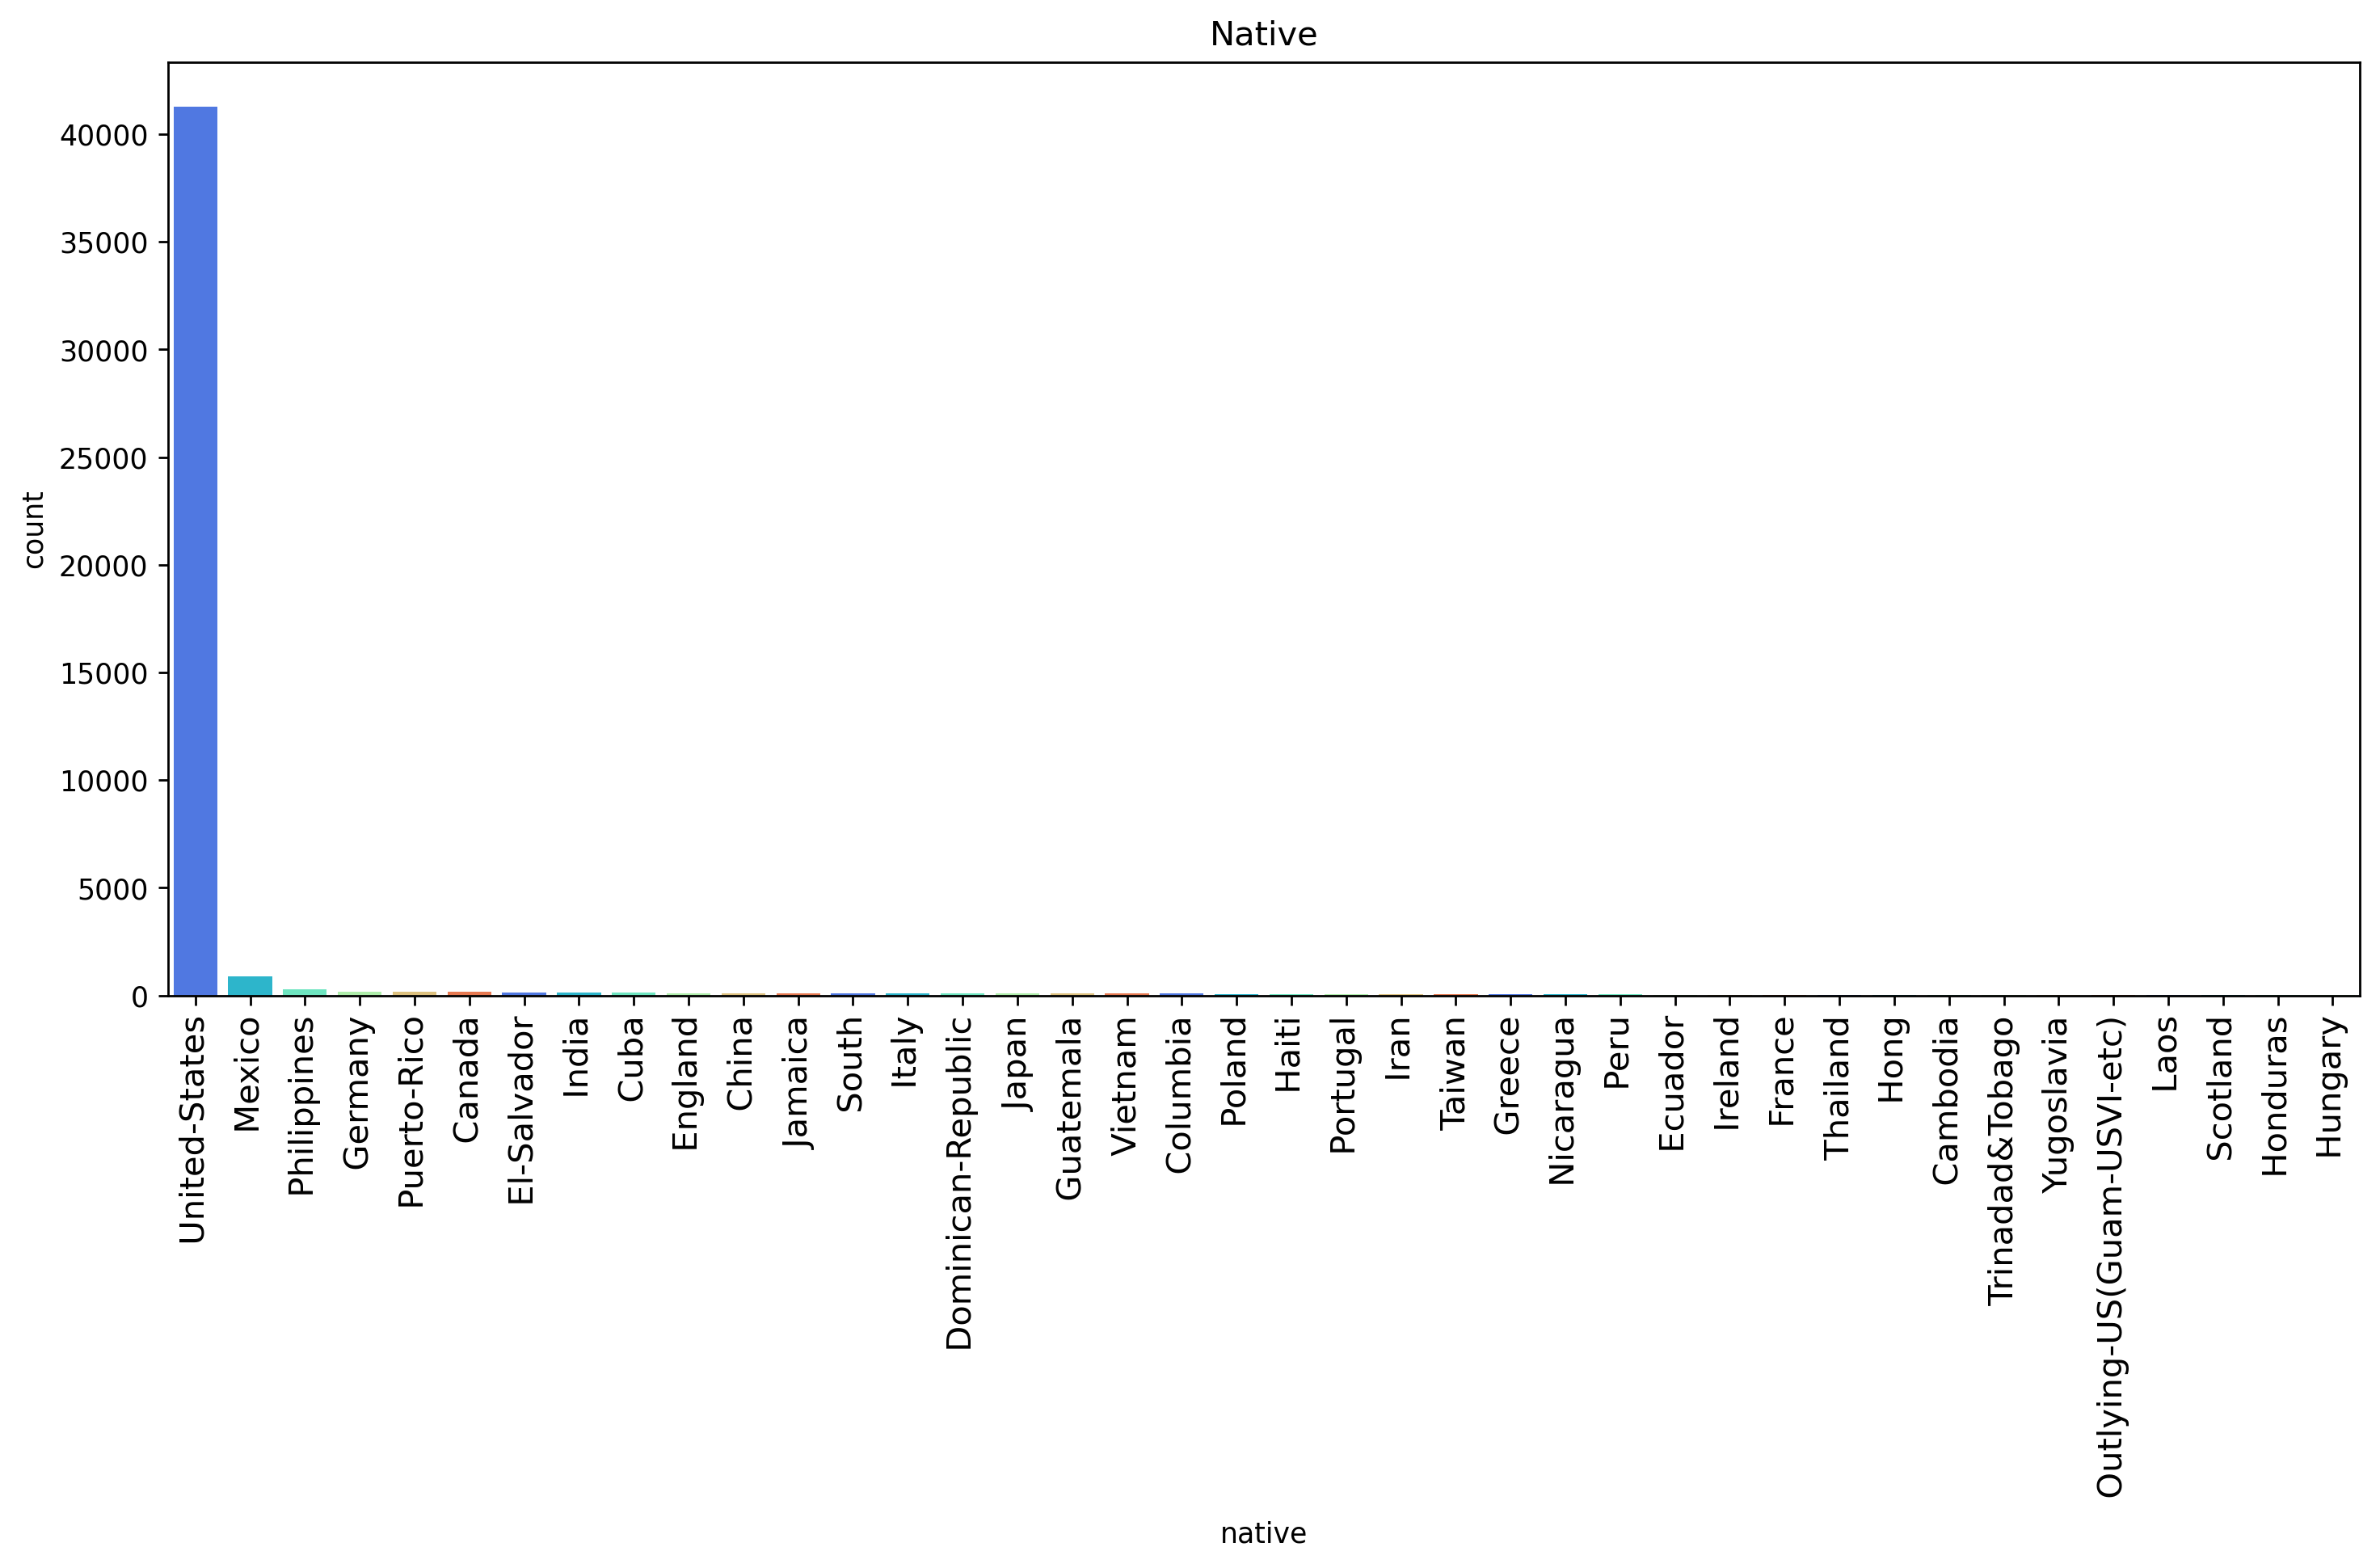

In [44]:
plt.figure(figsize=(14,6),dpi=250)
sns.countplot(x='native', data=raw_data, palette = pal, 
              order=raw_data['native'].value_counts().index)
plt.xticks(fontsize = 12,rotation=90)
plt.title('Native')

In [45]:
countlessthanfiftyk = len(raw_data[raw_data.Salary == ' <=50K'])
countgreatthanfiftyk = len(raw_data[raw_data.Salary == ' >50K'])
print("Percentage of Employees with Salary greater than 50k: {:.2f}%".format((countgreatthanfiftyk / (len(raw_data.Salary))*100)))
print("Percentage of Employees with Salary lesser than 50k: {:.2f}%".format((countlessthanfiftyk / (len(raw_data.Salary))*100)))

Percentage of Employees with Salary greater than 50k: 24.78%
Percentage of Employees with Salary lesser than 50k: 75.22%


In [46]:
raw_data.Salary.value_counts()

Salary
 <=50K    34013
 >50K     11208
Name: count, dtype: int64

Text(0.5, 1.0, 'Salary')

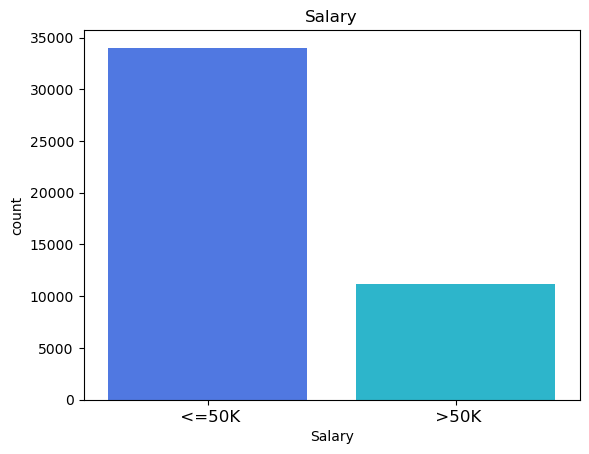

In [47]:
pal = sns.color_palette('rainbow')
sns.countplot(x='Salary', data=raw_data, palette = pal, 
              order=raw_data['Salary'].value_counts().index, );
plt.xticks(fontsize = 12)
plt.title('Salary')

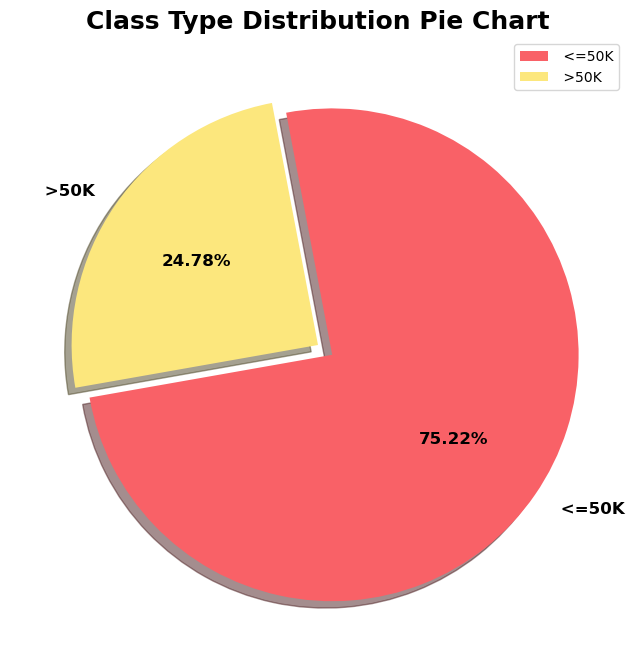

In [48]:
plt.figure(figsize = (12,8))
plt.pie(raw_data['Salary'].value_counts(),
       labels=raw_data.Salary.unique(),
       explode = [0.07,0.0],
       autopct= '%.2f%%',
        colors = ["#F96167", "#FCE77D"],
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'horizontal',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

<Axes: xlabel='workclass'>

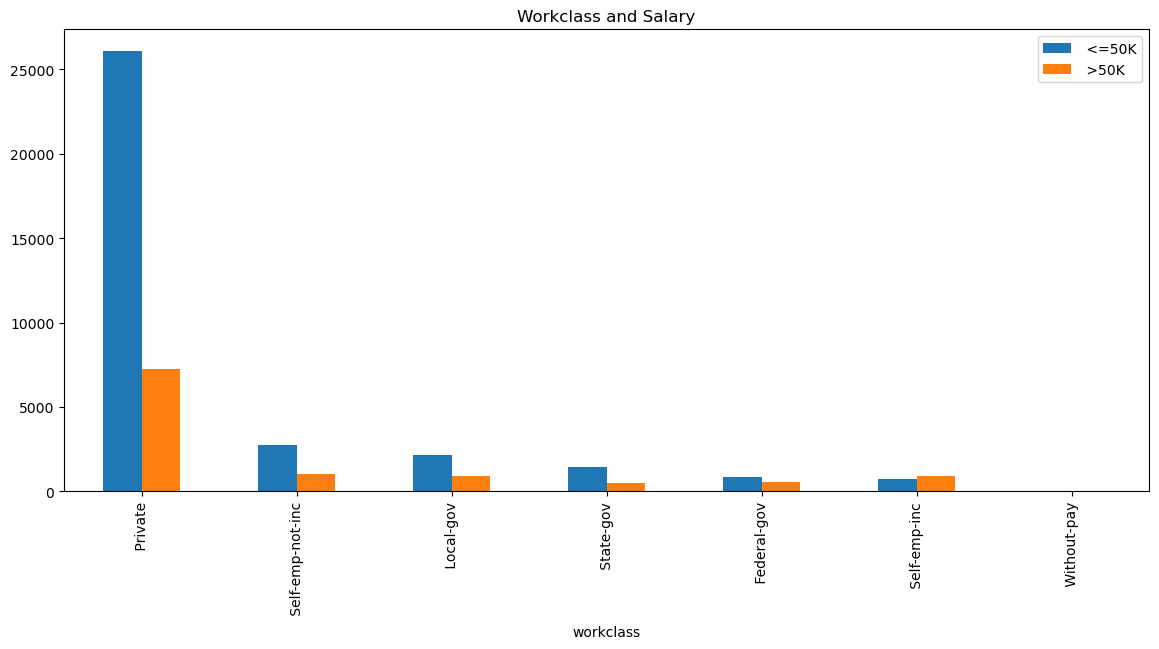

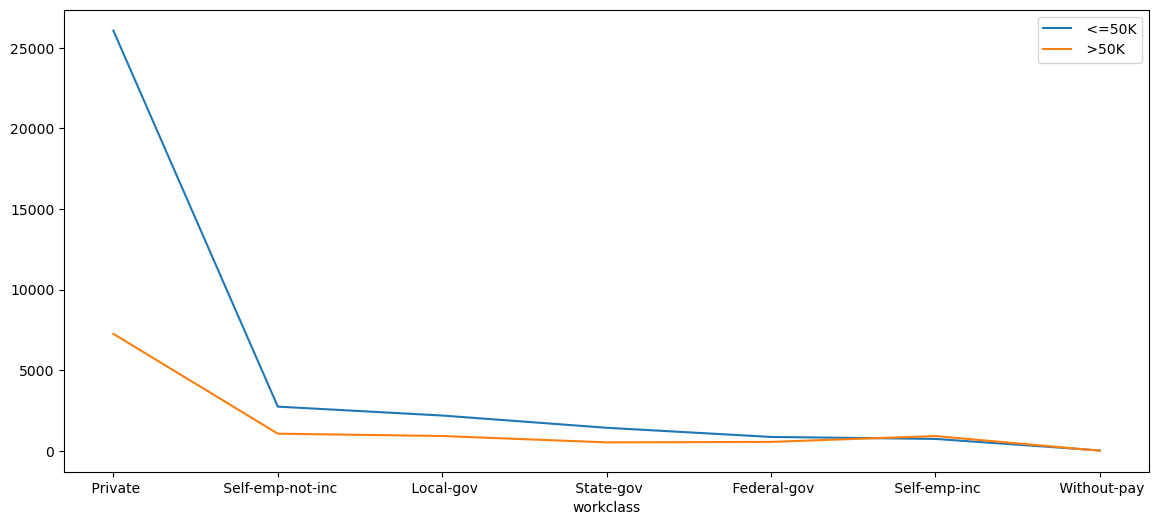

In [49]:
#workclass and Salary
j_df = pd.DataFrame()

j_df[' <=50K'] = raw_data[raw_data['Salary'] == ' <=50K']['workclass'].value_counts()
j_df[' >50K'] = raw_data[raw_data['Salary'] == ' >50K']['workclass'].value_counts()
j_df.plot.bar(title = 'Workclass and Salary',figsize=(14,6))
j_df.plot(figsize=(14,6))

<Axes: xlabel='Salary', ylabel='workclass'>

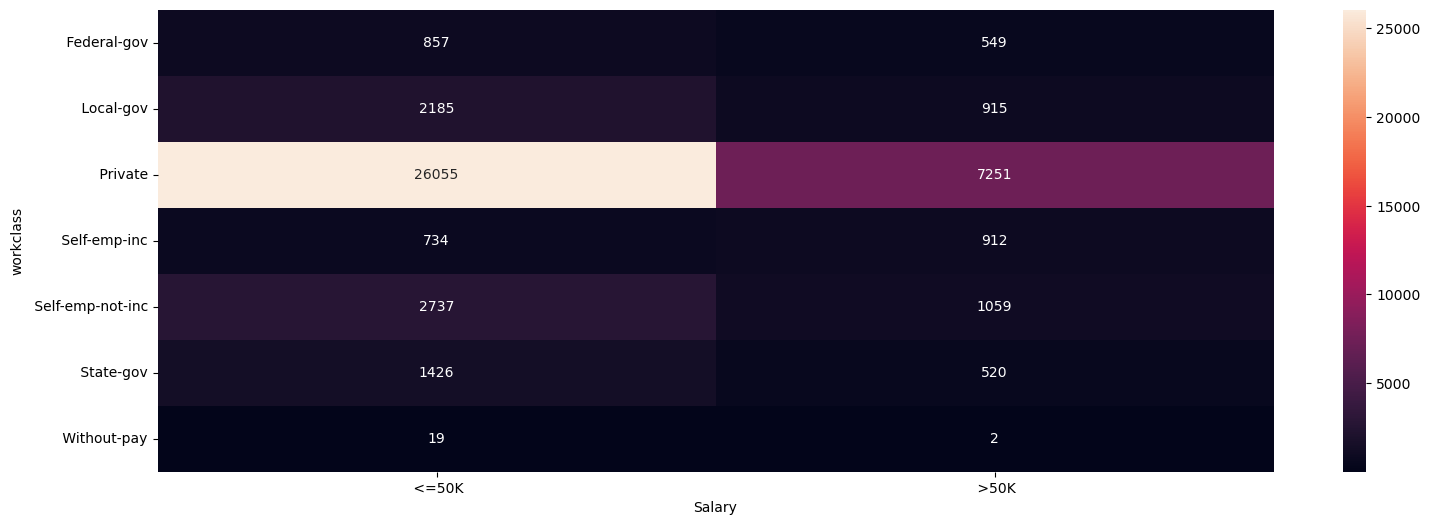

In [50]:
fig= plt.figure(figsize=(18, 6))
sns.heatmap(pd.crosstab(index=raw_data['workclass'], columns=raw_data['Salary']), annot=True, 
            fmt='g')

<Axes: xlabel='education'>

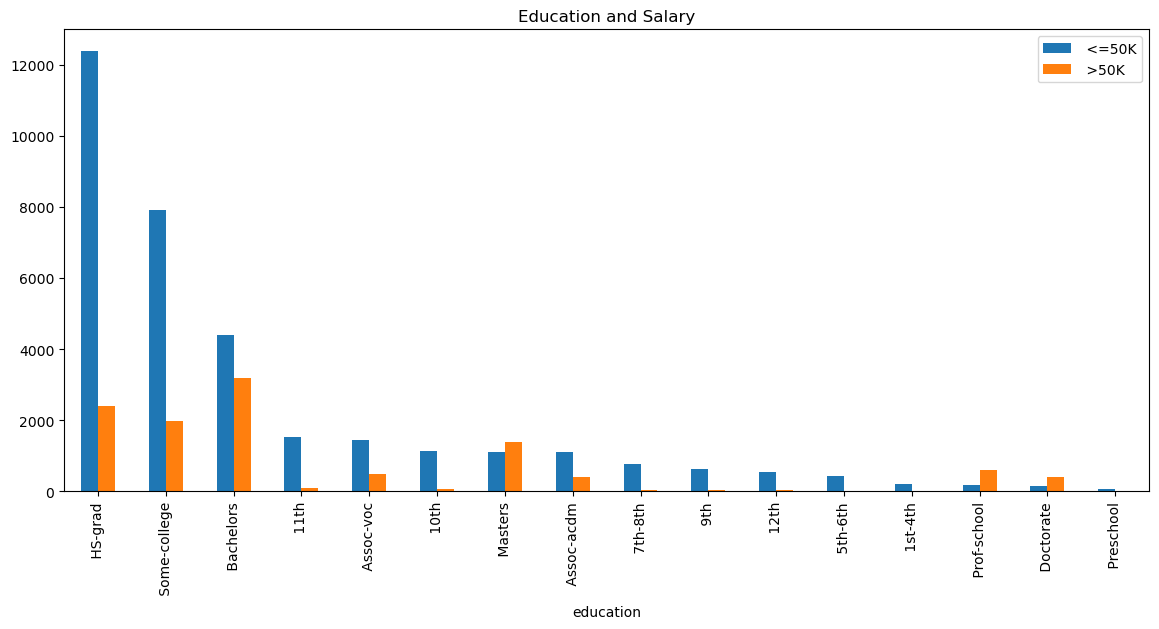

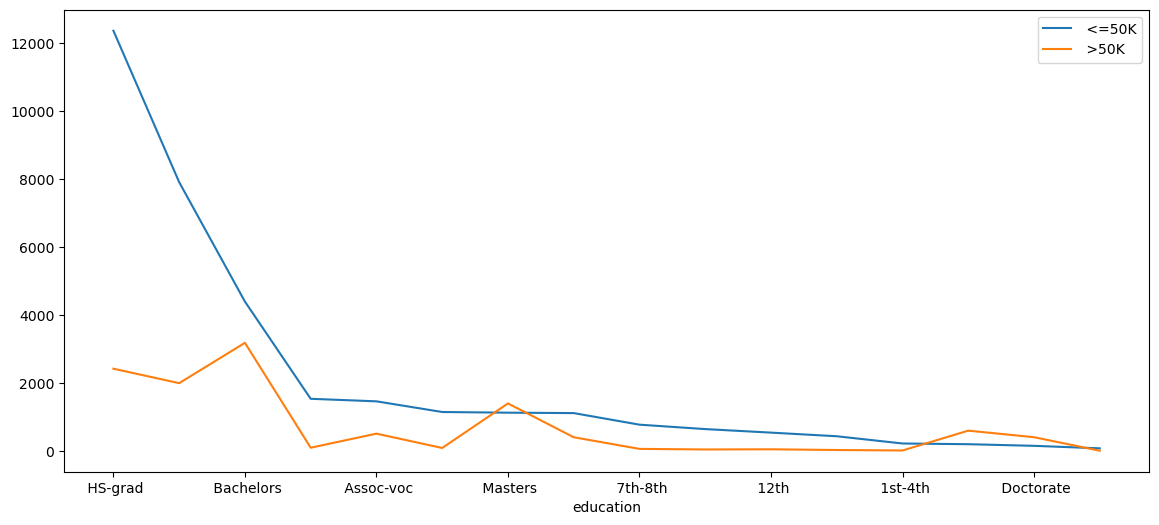

In [51]:
#Education and Salary
j_df = pd.DataFrame()

j_df[' <=50K'] = raw_data[raw_data['Salary'] == ' <=50K']['education'].value_counts()
j_df[' >50K'] = raw_data[raw_data['Salary'] == ' >50K']['education'].value_counts()
j_df.plot.bar(title = 'Education and Salary',figsize=(14,6))
j_df.plot(figsize=(14,6))

<Axes: xlabel='Salary', ylabel='education'>

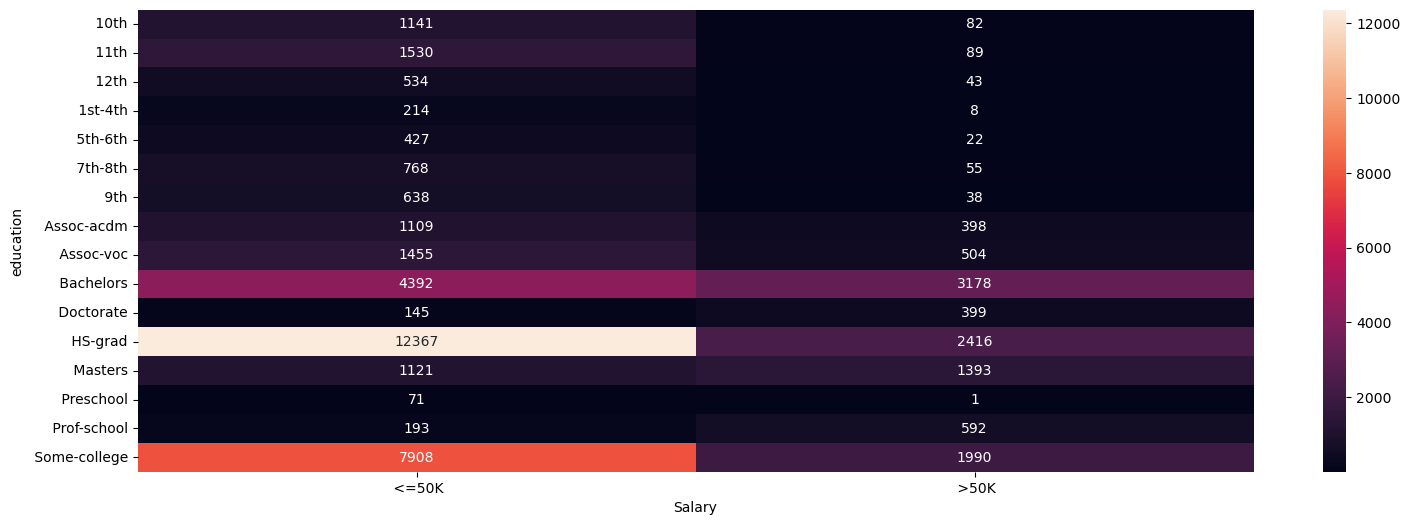

In [52]:
fig= plt.figure(figsize=(18, 6))
sns.heatmap(pd.crosstab(index=raw_data['education'], columns=raw_data['Salary']), annot=True, 
            fmt='g')

<Axes: xlabel='maritalstatus'>

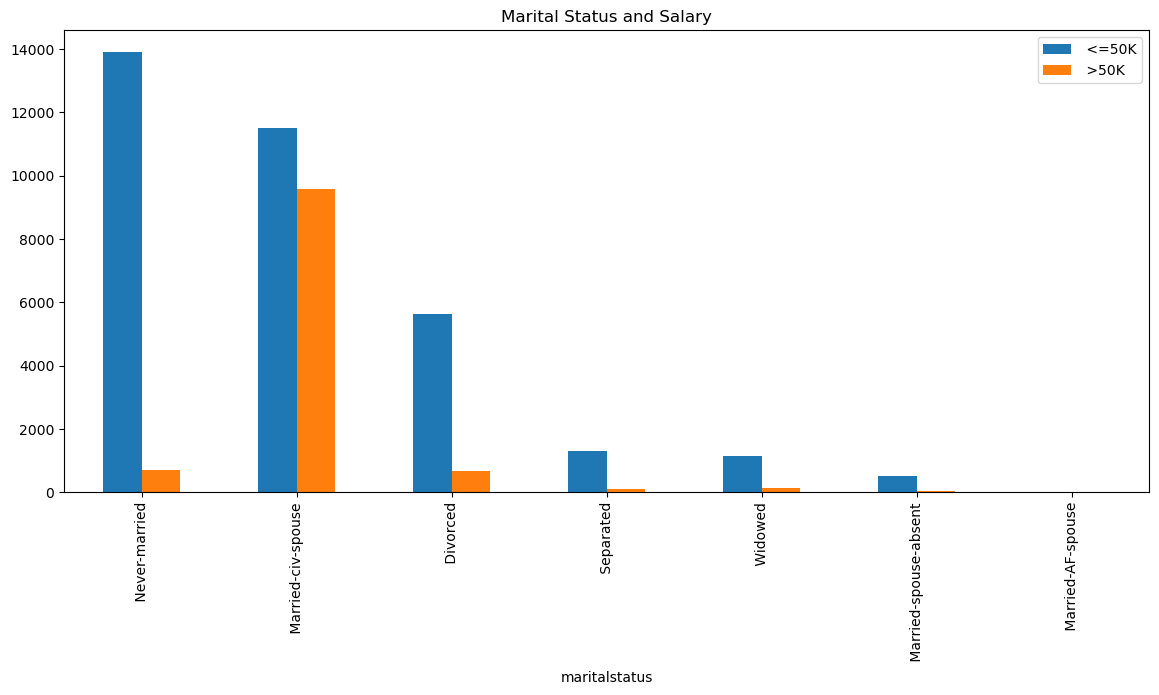

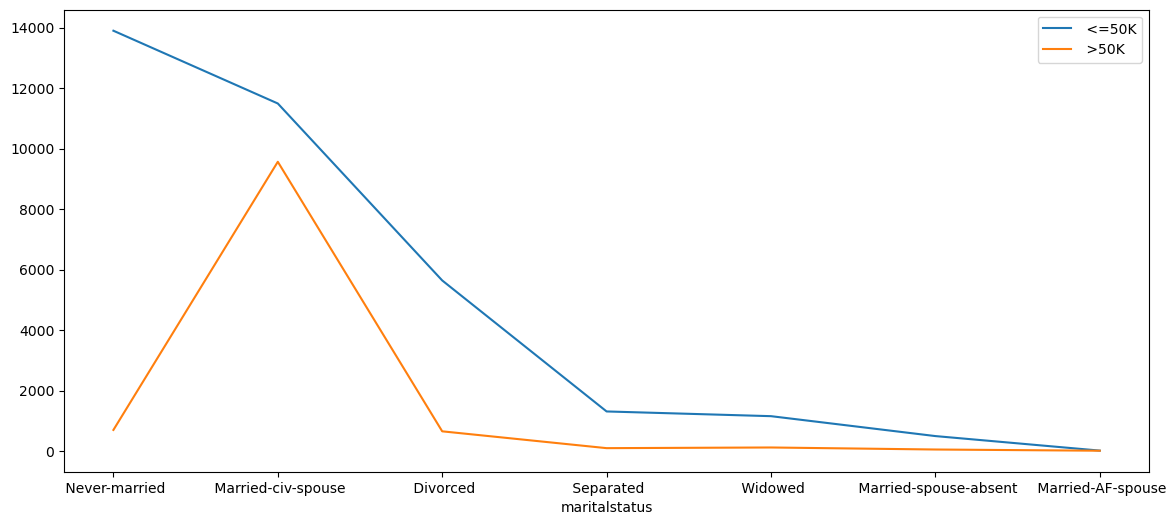

In [53]:
#maritalstatus and Salary
j_df = pd.DataFrame()

j_df[' <=50K'] = raw_data[raw_data['Salary'] == ' <=50K']['maritalstatus'].value_counts()
j_df[' >50K'] = raw_data[raw_data['Salary'] == ' >50K']['maritalstatus'].value_counts()
j_df.plot.bar(title = 'Marital Status and Salary',figsize=(14,6))
j_df.plot(figsize=(14,6))

<Axes: xlabel='Salary', ylabel='maritalstatus'>

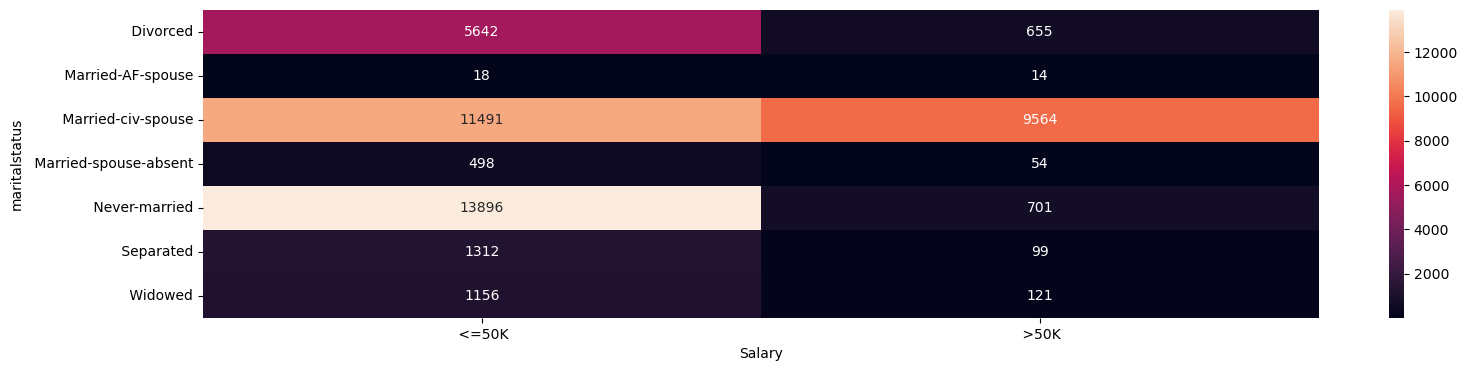

In [54]:
fig= plt.figure(figsize=(18, 4))
sns.heatmap(pd.crosstab(index=raw_data['maritalstatus'], columns=raw_data['Salary']), annot=True, 
            fmt='g')

<Axes: xlabel='occupation'>

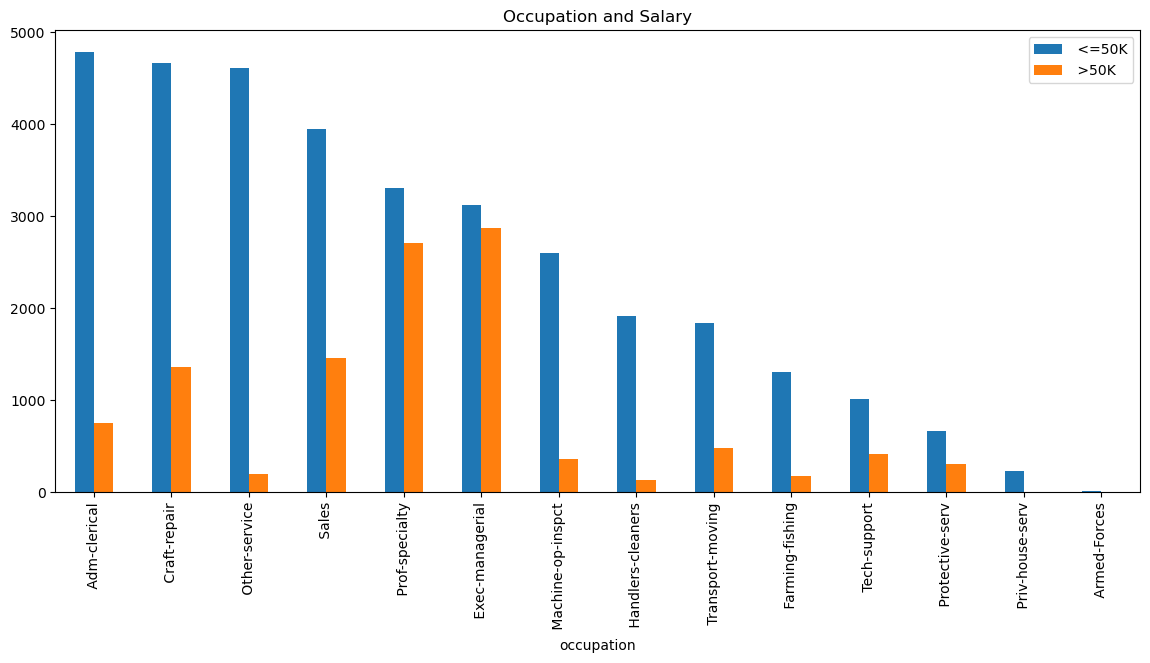

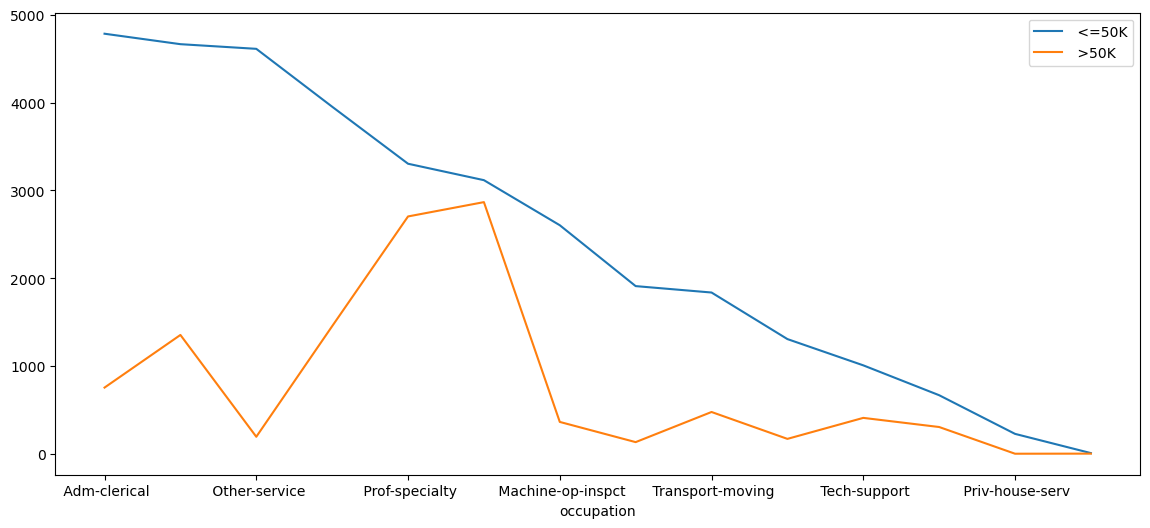

In [55]:
#occupation and Salary
j_df = pd.DataFrame()

j_df[' <=50K'] = raw_data[raw_data['Salary'] == ' <=50K']['occupation'].value_counts()
j_df[' >50K'] = raw_data[raw_data['Salary'] == ' >50K']['occupation'].value_counts()
j_df.plot.bar(title = 'Occupation and Salary',figsize=(14,6))
j_df.plot(figsize=(14,6))

<Axes: xlabel='Salary', ylabel='occupation'>

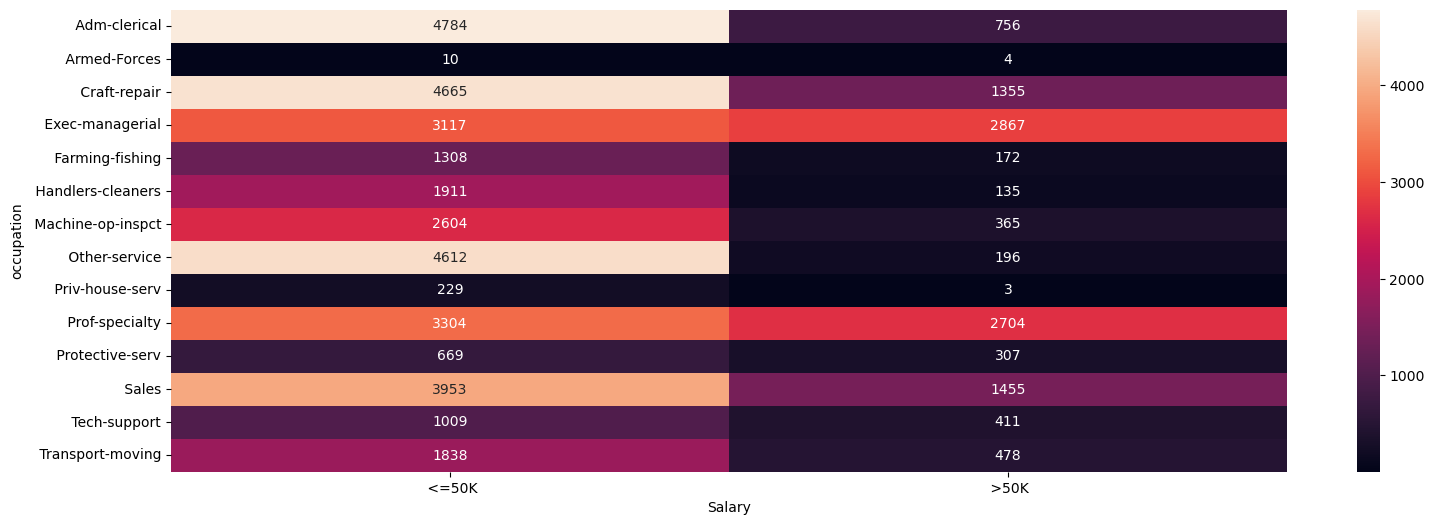

In [56]:
fig= plt.figure(figsize=(18, 6))
sns.heatmap(pd.crosstab(index=raw_data['occupation'], columns=raw_data['Salary']), annot=True, 
            fmt='g')

<Axes: xlabel='relationship'>

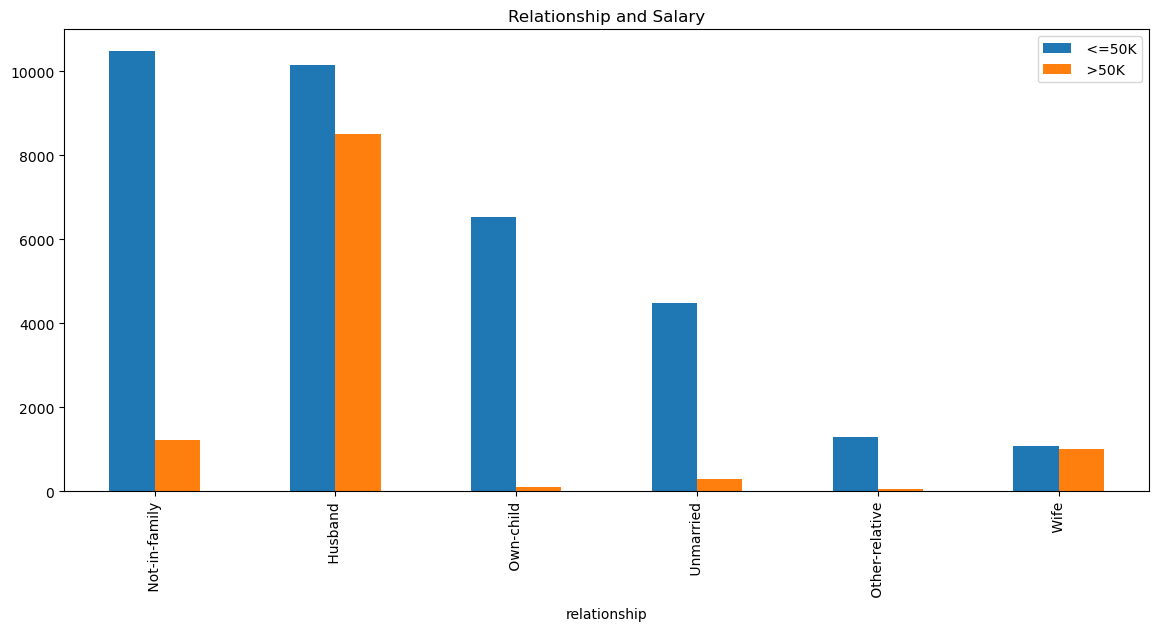

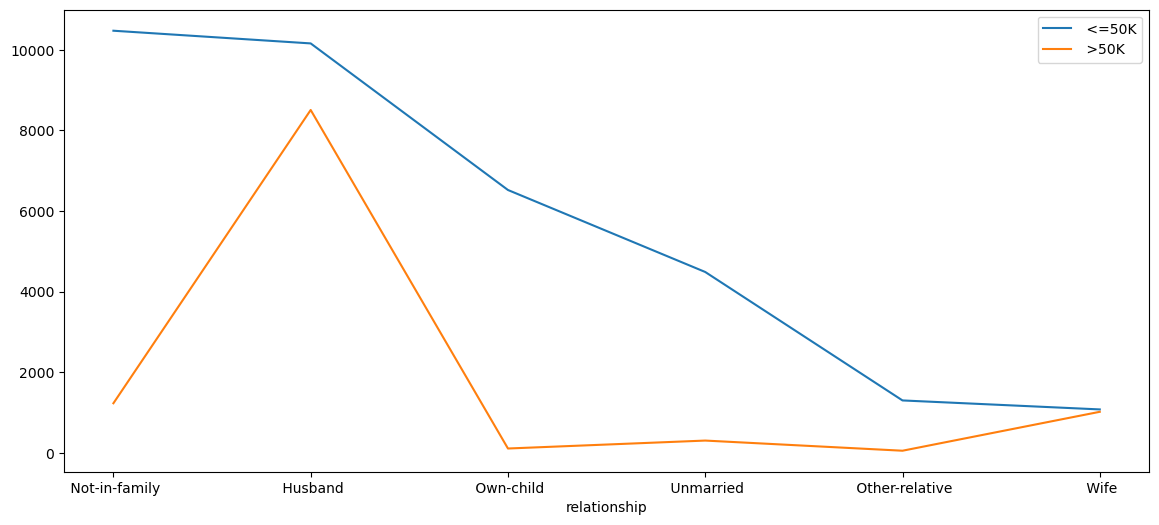

In [57]:
#relationship and Salary
j_df = pd.DataFrame()

j_df[' <=50K'] = raw_data[raw_data['Salary'] == ' <=50K']['relationship'].value_counts()
j_df[' >50K'] = raw_data[raw_data['Salary'] == ' >50K']['relationship'].value_counts()
j_df.plot.bar(title = 'Relationship and Salary',figsize=(14,6))
j_df.plot(figsize=(14,6))

<Axes: xlabel='Salary', ylabel='relationship'>

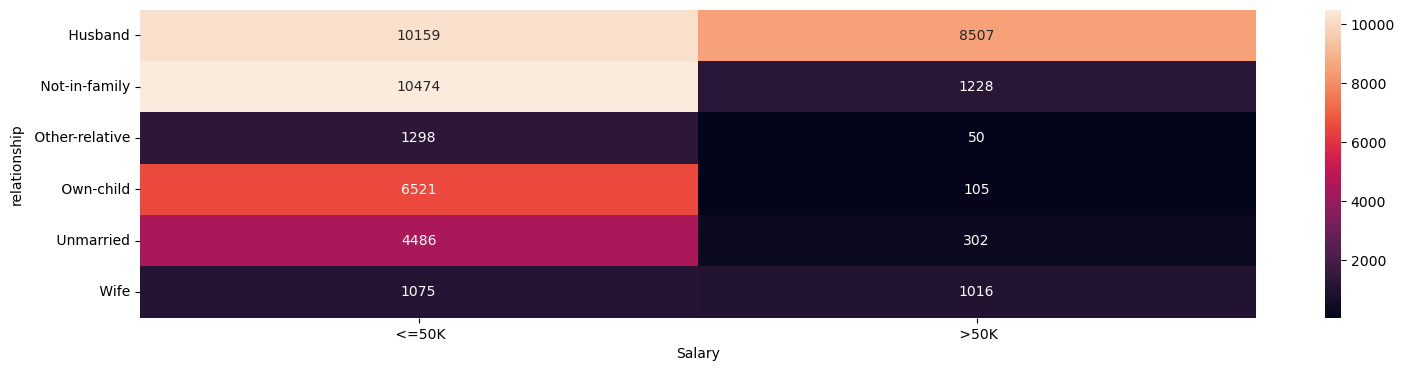

In [58]:
fig= plt.figure(figsize=(18, 4))
sns.heatmap(pd.crosstab(index=raw_data['relationship'], columns=raw_data['Salary']), annot=True, 
            fmt='g')

<Axes: xlabel='race'>

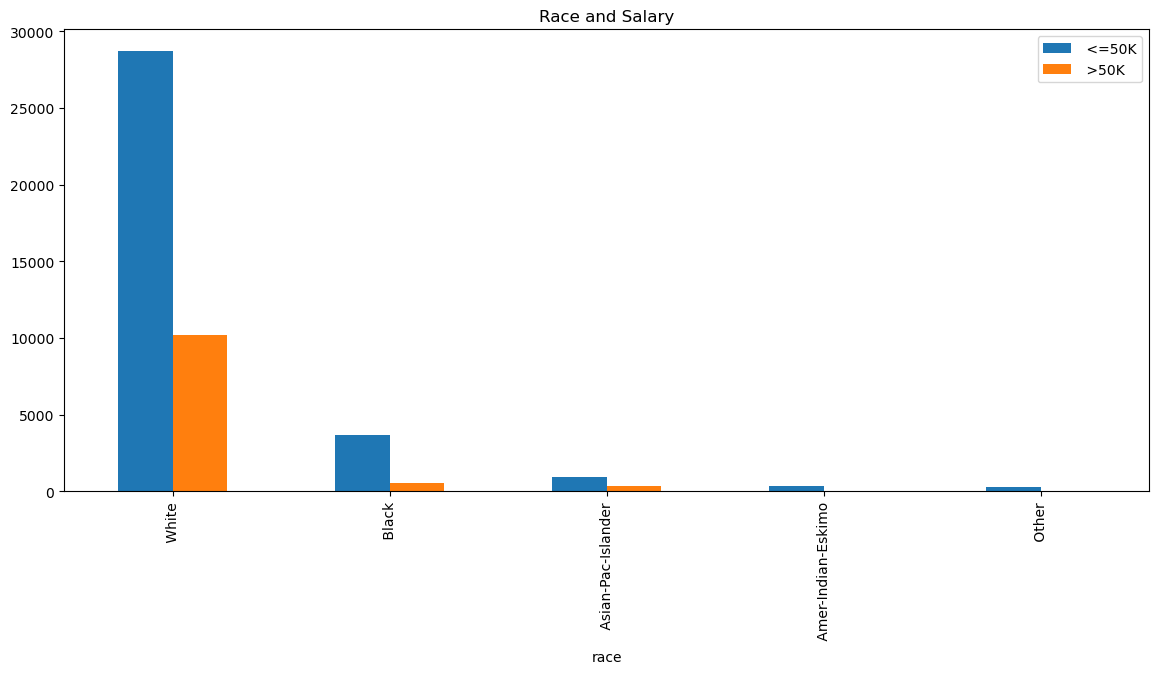

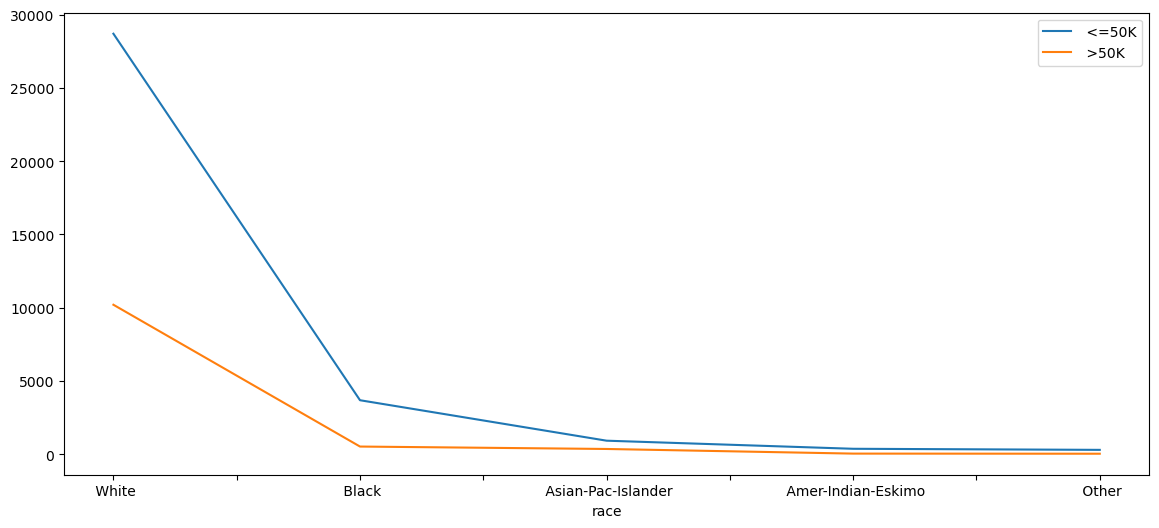

In [59]:
#Race and Salary
j_df = pd.DataFrame()

j_df[' <=50K'] = raw_data[raw_data['Salary'] == ' <=50K']['race'].value_counts()
j_df[' >50K'] = raw_data[raw_data['Salary'] == ' >50K']['race'].value_counts()
j_df.plot.bar(title = 'Race and Salary',figsize=(14,6))
j_df.plot(figsize=(14,6))

<Axes: xlabel='Salary', ylabel='race'>

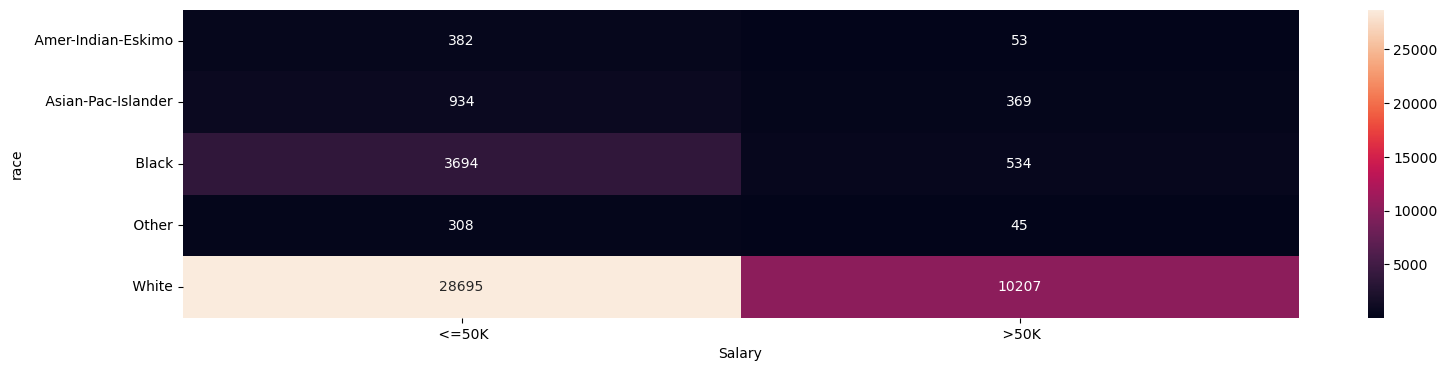

In [60]:
fig= plt.figure(figsize=(18, 4))
sns.heatmap(pd.crosstab(index=raw_data['race'], columns=raw_data['Salary']), annot=True, 
            fmt='g')

<Axes: xlabel='sex'>

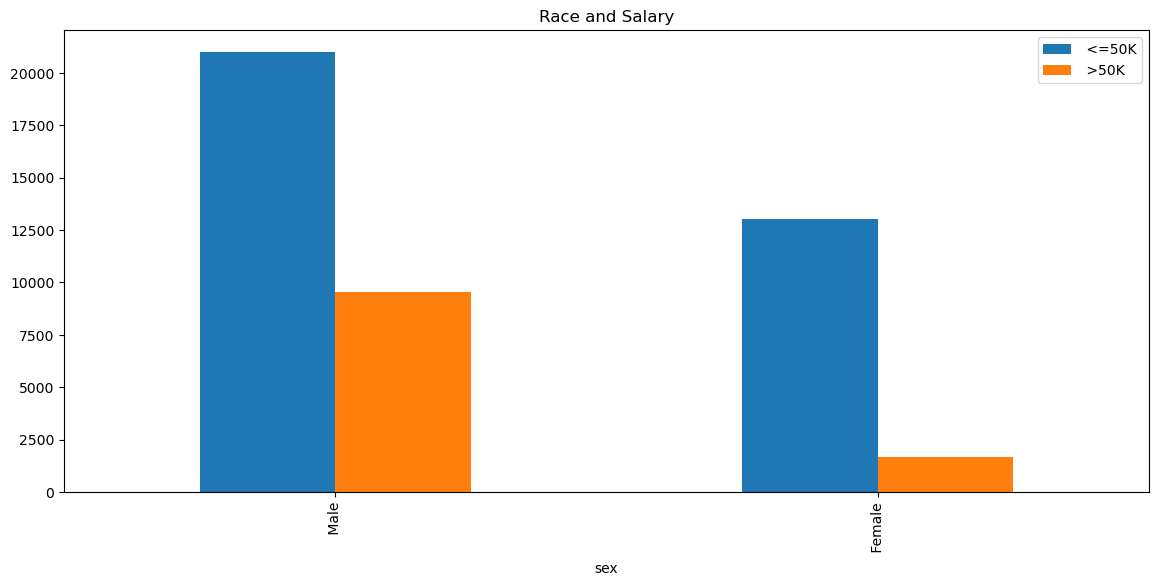

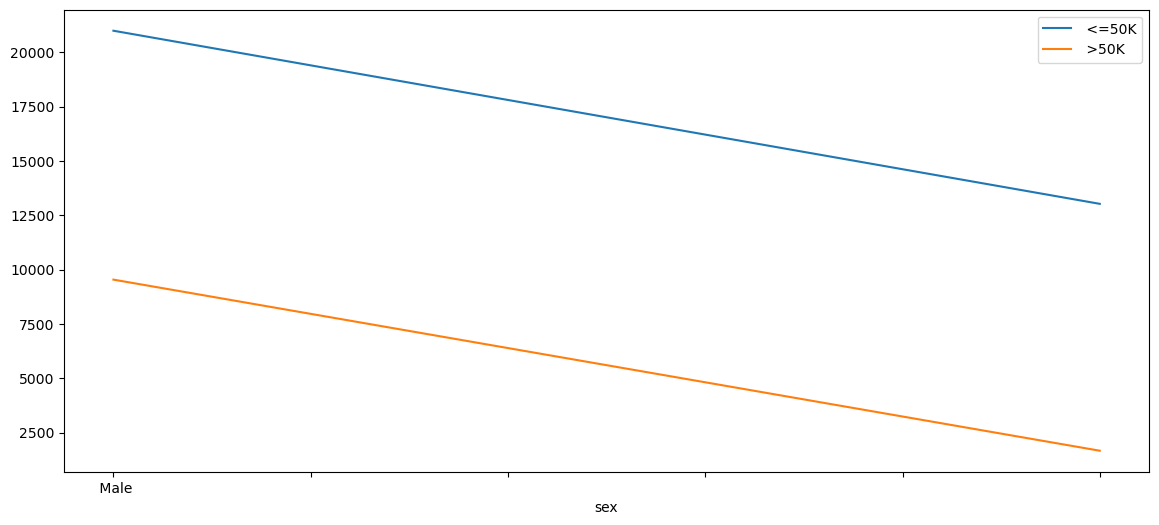

In [61]:
#Sex and Salary
j_df = pd.DataFrame()

j_df[' <=50K'] = raw_data[raw_data['Salary'] == ' <=50K']['sex'].value_counts()
j_df[' >50K'] = raw_data[raw_data['Salary'] == ' >50K']['sex'].value_counts()
j_df.plot.bar(title = 'Race and Salary',figsize=(14,6))
j_df.plot(figsize=(14,6))

<Axes: xlabel='Salary', ylabel='sex'>

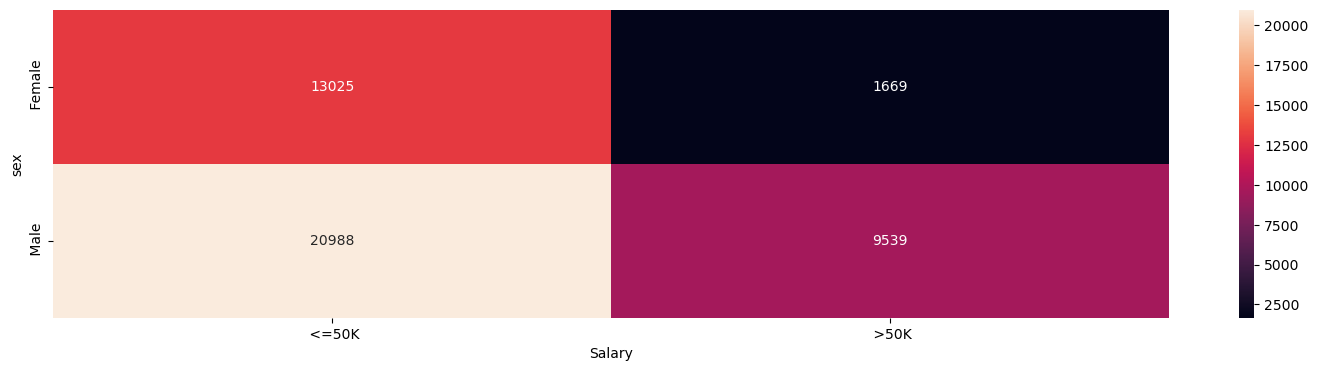

In [62]:
fig= plt.figure(figsize=(18, 4))
sns.heatmap(pd.crosstab(index=raw_data['sex'], columns=raw_data['Salary']), annot=True, 
            fmt='g')

<Axes: xlabel='native'>

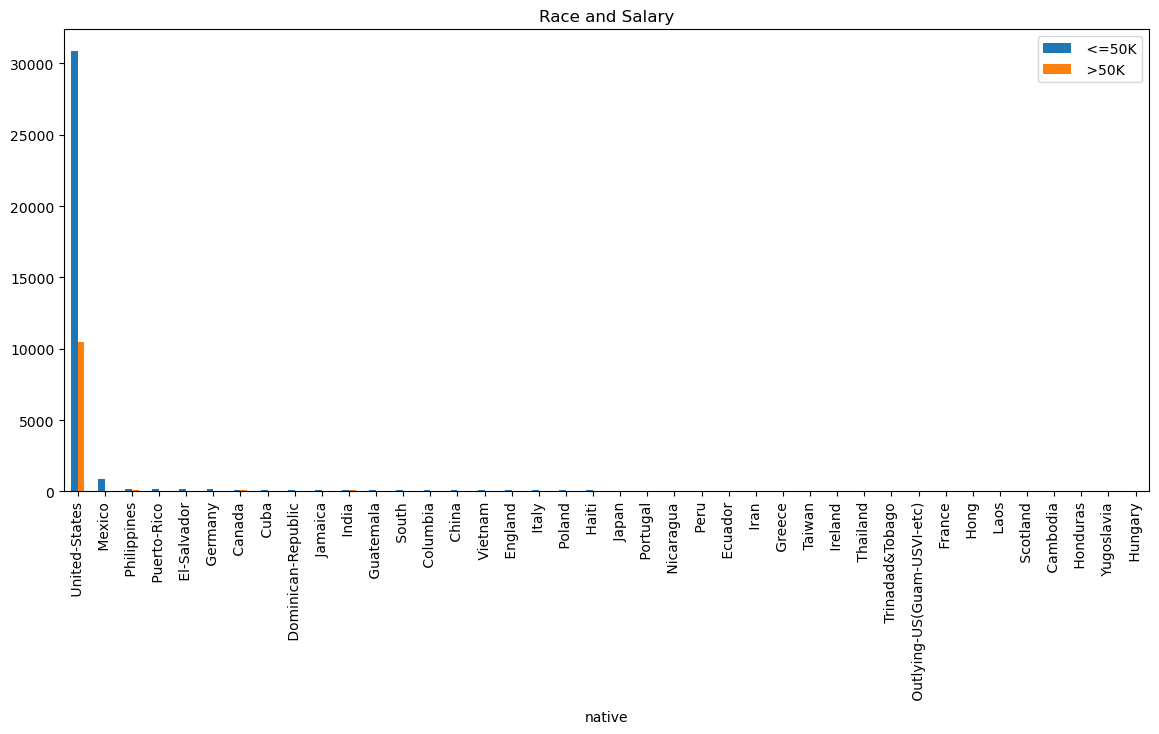

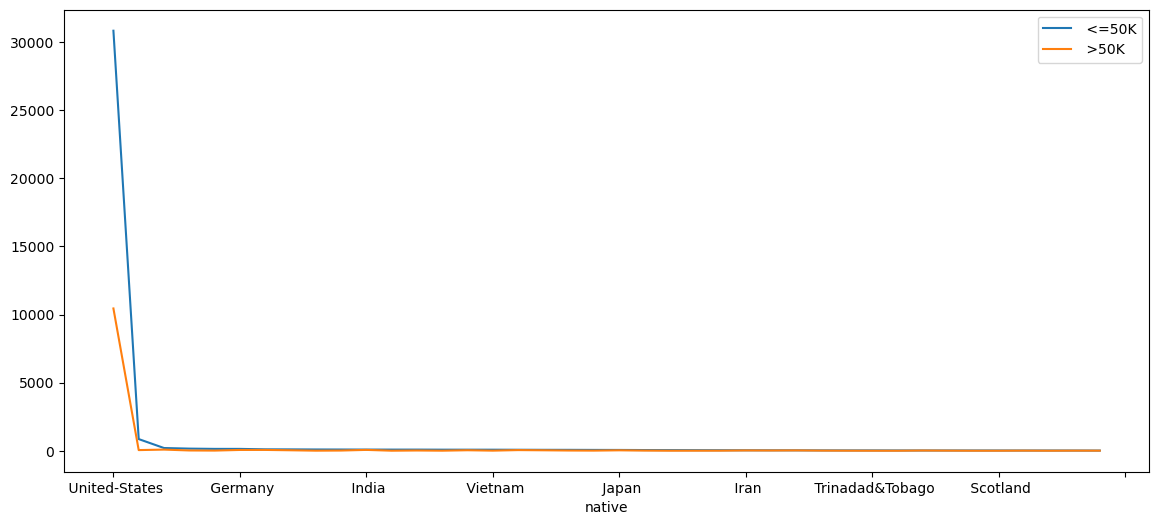

In [63]:
#Native and Salary
j_df = pd.DataFrame()

j_df[' <=50K'] = raw_data[raw_data['Salary'] == ' <=50K']['native'].value_counts()
j_df[' >50K'] = raw_data[raw_data['Salary'] == ' >50K']['native'].value_counts()
j_df.plot.bar(title = 'Race and Salary',figsize=(14,6))
j_df.plot(figsize=(14,6))

<Axes: xlabel='Salary', ylabel='native'>

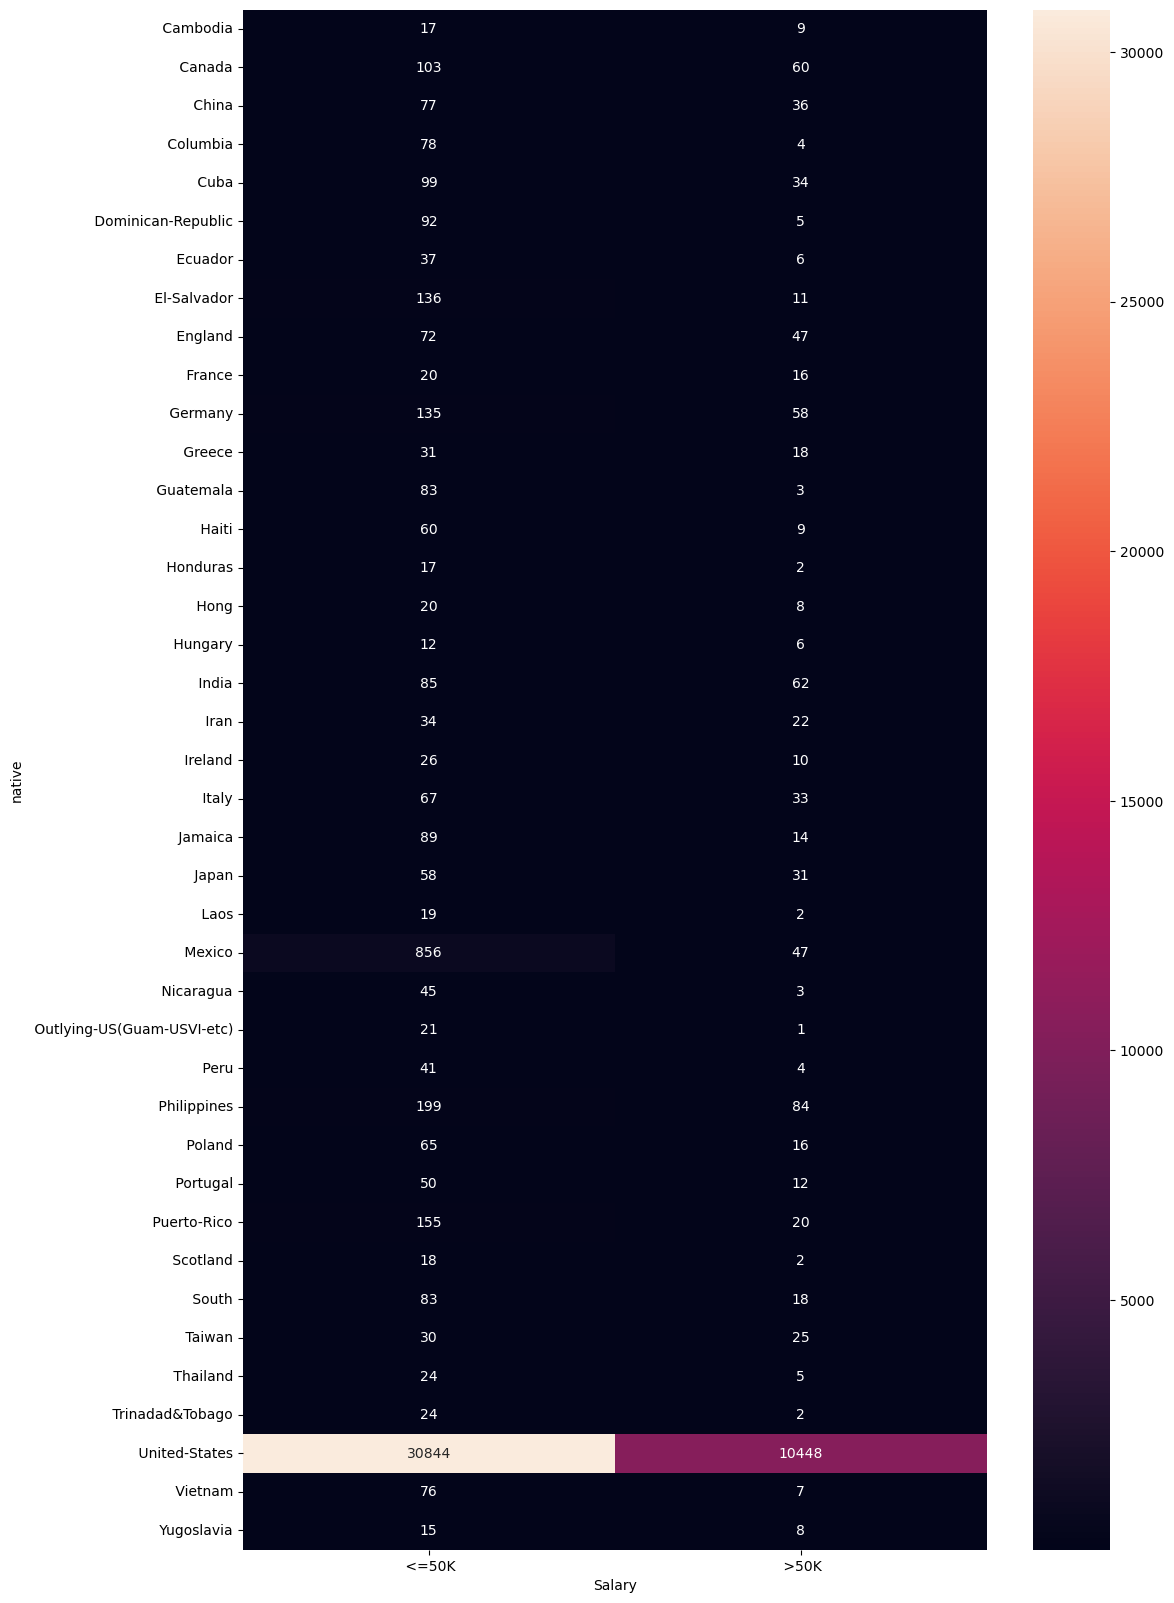

In [64]:
fig= plt.figure(figsize=(12, 20))
sns.heatmap(pd.crosstab(index=raw_data['native'], columns=raw_data['Salary']), annot=True, 
            fmt='g')

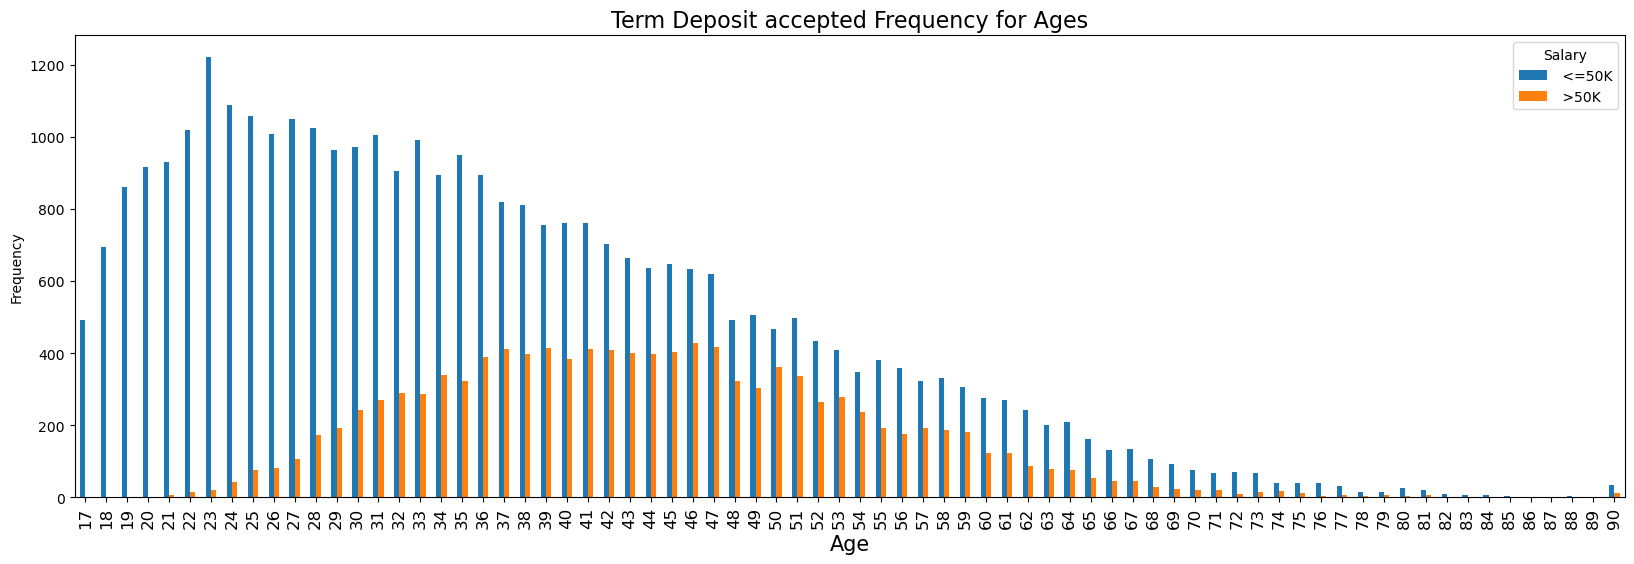

In [65]:
pd.crosstab(raw_data.age,raw_data.Salary).plot(kind="bar",figsize=(20,6))
plt.title('Term Deposit accepted Frequency for Ages', fontsize = 16)
plt.xticks(fontsize = 12)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Frequency')
plt.show()

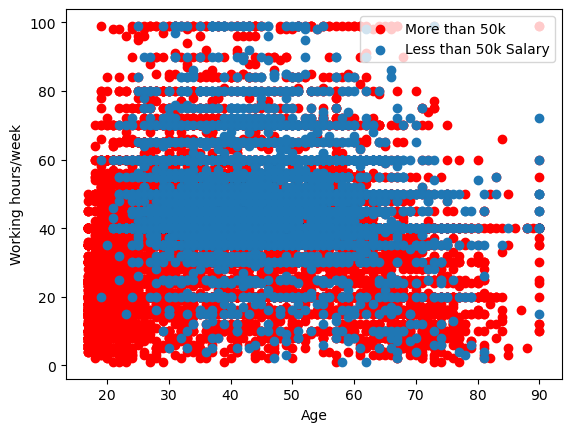

In [66]:
plt.scatter(x=raw_data.age[raw_data.Salary== ' <=50K'], y=raw_data.hoursperweek[(raw_data.Salary== ' <=50K')], c="red")
plt.scatter(x=raw_data.age[raw_data.Salary== ' >50K'], y=raw_data.hoursperweek[(raw_data.Salary== ' >50K')])
plt.legend(["More than 50k", "Less than 50k Salary"])
plt.xlabel("Age")
plt.ylabel("Working hours/week")
plt.show()

In [67]:
raw_data.age.value_counts()

age
36    1283
33    1279
31    1274
35    1272
23    1241
      ... 
88       5
85       5
86       1
89       1
87       1
Name: count, Length: 74, dtype: int64

In [68]:
raw_data.hoursperweek.describe()

count    45221.000000
mean        40.938038
std         12.007640
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hoursperweek, dtype: float64

In [69]:
count_job_response_pct = pd.crosstab(raw_data['Salary'],raw_data['workclass']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct

workclass,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
Salary,,,,,,,
<=50K,60.953058,70.483871,78.229148,44.592953,72.102213,73.27852,90.47619
>50K,39.046942,29.516129,21.770852,55.407047,27.897787,26.72148,9.52381


In [70]:
count_job_response_pct = count_job_response_pct.transpose()
count_job_response_pct

Salary,<=50K,>50K
workclass,,
Federal-gov,60.953058,39.046942
Local-gov,70.483871,29.516129
Private,78.229148,21.770852
Self-emp-inc,44.592953,55.407047
Self-emp-not-inc,72.102213,27.897787
State-gov,73.278520,26.721480
Without-pay,90.476190,9.523810


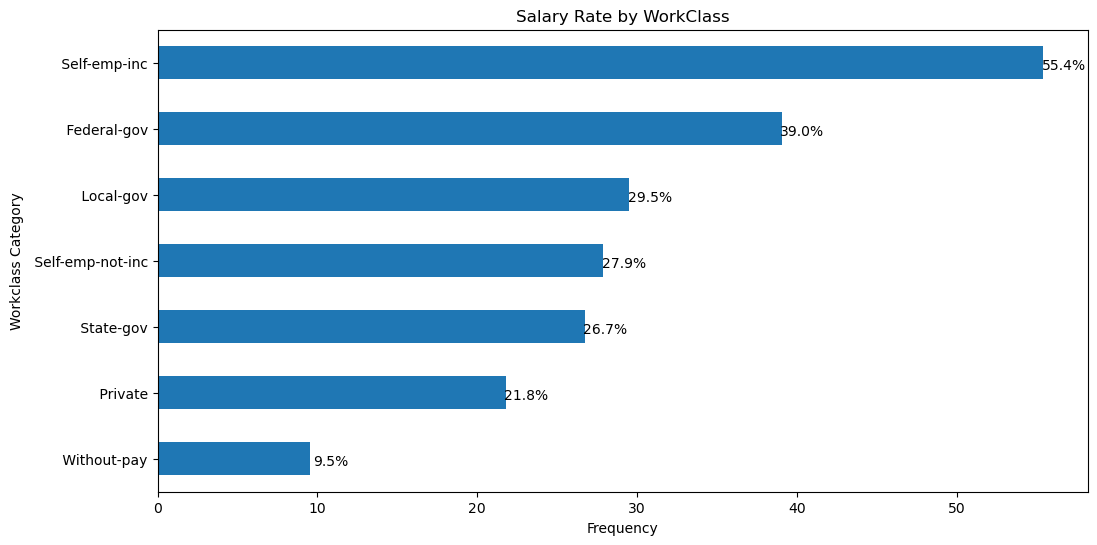

In [71]:
plot_job = count_job_response_pct[' >50K'].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (12,6))
                                                                               
plt.title('Salary Rate by WorkClass')
plt.xlabel('Frequency')
plt.ylabel('Workclass Category')

# Label each bar
for rec, label in zip(plot_job.patches,
                      count_job_response_pct[' >50K'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+1.3, 
                  rec.get_y()+ rec.get_height()-0.4, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

In [72]:
count_job_response_pct = pd.crosstab(raw_data['Salary'],raw_data['education']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
Salary,,,,,,,,,,,,,,,,
<=50K,93.295176,94.502779,92.54766,96.396396,95.100223,93.317132,94.378698,73.589914,74.272588,58.018494,26.654412,83.656903,44.590294,98.611111,24.585987,79.894928
>50K,6.704824,5.497221,7.45234,3.603604,4.899777,6.682868,5.621302,26.410086,25.727412,41.981506,73.345588,16.343097,55.409706,1.388889,75.414013,20.105072


In [73]:
count_job_response_pct = count_job_response_pct.transpose()
count_job_response_pct

Salary,<=50K,>50K
education,,
10th,93.295176,6.704824
11th,94.502779,5.497221
12th,92.547660,7.452340
1st-4th,96.396396,3.603604
5th-6th,95.100223,4.899777
7th-8th,93.317132,6.682868
9th,94.378698,5.621302
Assoc-acdm,73.589914,26.410086
Assoc-voc,74.272588,25.727412


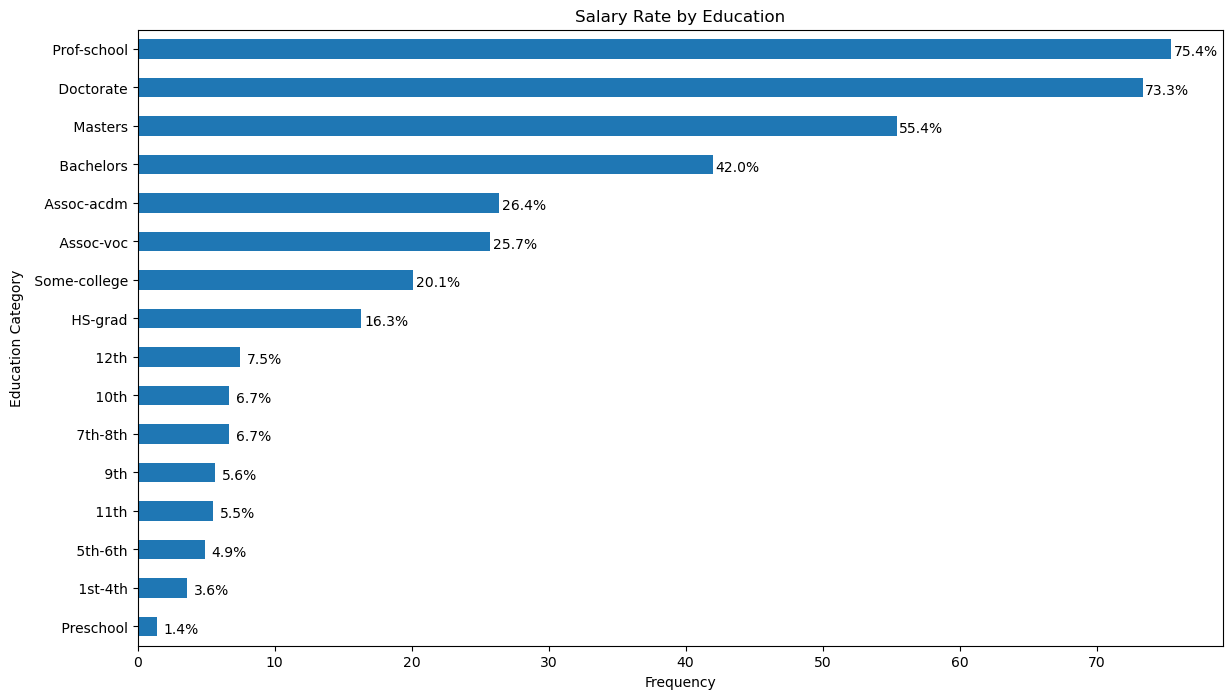

In [74]:
plot_job = count_job_response_pct[' >50K'].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (14,8))
                                                                               
plt.title('Salary Rate by Education')
plt.xlabel('Frequency')
plt.ylabel('Education Category')

# Label each bar
for rec, label in zip(plot_job.patches,
                      count_job_response_pct[' >50K'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+1.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

In [75]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
df= raw_data.copy()
label_encoder = preprocessing.LabelEncoder()
df["education"]=label_encoder.fit_transform(df["education"])
df["workclass"]=label_encoder.fit_transform(df["workclass"])
df["maritalstatus"]=label_encoder.fit_transform(df["maritalstatus"])
df["sex"]=label_encoder.fit_transform(df["sex"])
df["race"]=label_encoder.fit_transform(df["race"])
df["occupation"]=label_encoder.fit_transform(df["occupation"])
df["relationship"]=label_encoder.fit_transform(df["relationship"])
df["native"]=label_encoder.fit_transform(df["native"])
df.head(10)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K
5,37,2,12,14,2,3,5,4,0,0,0,40,37,<=50K
6,49,2,6,5,3,7,1,2,0,0,0,16,21,<=50K
7,52,4,11,9,2,3,0,4,1,0,0,45,37,>50K
8,31,2,12,14,4,9,1,4,0,14084,0,50,37,>50K
9,42,2,9,13,2,3,0,4,1,5178,0,40,37,>50K


In [76]:
df['Salary'] = raw_data.Salary
df['Salary'] = np.where(df['Salary'].str.contains(" >50K"), 1, 0)
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [77]:
df[continuous_feature]

,age,capitalgain,capitalloss,hoursperweek
0,39,2174,0,40
1,50,0,0,13
2,38,0,0,40
3,53,0,0,40
4,28,0,0,40
...,...,...,...,...
45216,33,0,0,40
45217,39,0,0,36
45218,38,0,0,50
45219,44,5455,0,40


In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = df[continuous_feature]
df[continuous_feature] = scaler.fit_transform(features.values)
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,0.034190,5,9,13,4,0,1,4,1,0.142884,-0.218728,-0.078121,37,0
1,0.866399,4,9,13,2,3,0,4,1,-0.146735,-0.218728,-2.326714,37,0
2,-0.041466,2,11,9,0,5,1,4,1,-0.146735,-0.218728,-0.078121,37,0
3,1.093365,2,1,7,2,5,0,2,1,-0.146735,-0.218728,-0.078121,37,0
4,-0.798019,2,9,13,2,9,5,2,0,-0.146735,-0.218728,-0.078121,4,0


In [79]:
x = df.drop('Salary',axis=1)
y = df['Salary']

In [80]:
y.unique()

array([0, 1])

In [81]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)

In [82]:
# summarize train and test composition
counter_train = Counter(y_train)
counter_test = Counter(y_test)
print('Training Data',counter_train,'Testing Data',counter_test)

Training Data Counter({0: 23809, 1: 7845}) Testing Data Counter({0: 10204, 1: 3363})


In [83]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (31654, 13)
Shape of X_test:  (13567, 13)
Shape of y_train:  (31654,)
Shape of y_test (13567,)


In [84]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [85]:
x = df.drop(['Salary'], axis=1)
y = df['Salary']

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.30, random_state=0,stratify=y)

In [86]:
def test_eval(clf_model, X_test, y_test, algo=None, sampling=None):
    # Test set prediction
    y_prob=clf_model.predict_proba(X_test)
    y_pred=clf_model.predict(X_test)

    print('Confusion Matrix')
    print('='*60)
    #plot_confusion_matrix(clf_model, X_test, y_test)  
    #plt.show() 
    print(confusion_matrix(y_test,y_pred),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    print('AUC-ROC')
    print('='*60)
    print(roc_auc_score(y_test, y_prob[:,1]))
    
    #x = roc_auc_score(y_test, y_prob[:,1])
    f1 = f1_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    precision = precision_score(y_test, y_pred, average='binary')
          
    
    return algo,precision,recall,f1,sampling

In [87]:
model_params = {

    'SVC' : {
        'model' : SVC(probability=True),
        'params' :[ {'C':[1], 'kernel':['linear']}]
    }
}

In [88]:
from tqdm.notebook import tqdm_notebook
import time
for i in tqdm_notebook(range(10), desc = 'Progress using tqdm_notebook()'):
    time.sleep(0.5)

Progress using tqdm_notebook():   0%|          | 0/10 [00:00<?, ?it/s]

In [89]:
# initiating the model
model = SVC(kernel='poly', probability=True)

In [90]:
model_params = {

    'SVC' : {
        'model' : SVC(probability=True),
        'params' :[ 
            {'C':[1, 10, 100, 1000]},
             {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
                  ]
    }
}

In [ ]:
lst = [raw_data]
for column in lst:
    column['age_group'] = pd.cut(column['age'], bins=[0, 30, 40, 50, 60, float('inf')], labels=['<30', '30-39', '40-49', '50-59', '60+'], right=False)

count_age_response_pct = pd.crosstab(raw_data['Salary'], raw_data['age_group']).apply(lambda x: x / x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose()

age = pd.DataFrame(raw_data['age_group'].value_counts())
age['% Employees'] = age['age_group'] * 100 / age['age_group'].sum()
age['% Salary >50k'] = count_age_response_pct[' >50K']

# Reorder the index to match the age categories
age = age.reindex(['<30', '30-39', '40-49', '50-59', '60+'])

plot_age = age[['% Salary >50k', '% Employees']].plot(kind='bar', figsize=(8, 6), color=('green', 'red'))
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'), rotation='horizontal')
plt.title('Salary vs. Employee Rate by Age')

# Label the bar with percentages
for rec, label in zip(plot_age.patches, age['% Salary >50k'].round(1).astype(str)):
    plot_age.text(rec.get_x() + rec.get_width() / 2, rec.get_height() + 1, label + '%', ha='center', color='black')

plt.show()
